# **Problema del negocio**

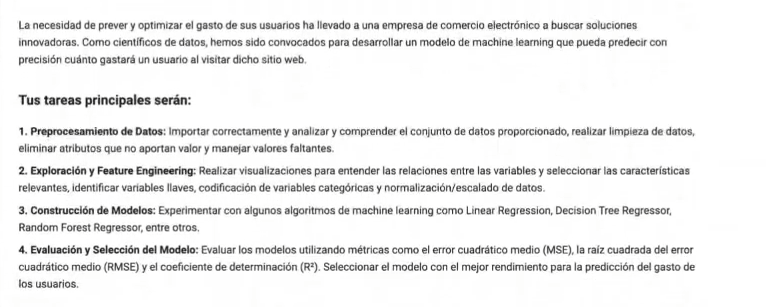

#**1. Configuración del Ambiente**

##**Diccionario de Datos**

- **channelGrouping:** el canal a través del cual el usuario llegó a la Tienda.
- **date:** la fecha en la que el usuario visitó la Tienda.
- **device:** las especificaciones del dispositivo utilizado para acceder a la Tienda.
- **fullVisitorId:** un identificador único para cada usuario de Google Merchandise Store.
- **geoNetwork:** esta sección contiene información sobre la geografía del usuario.
- **sessionId:** un identificador único para esta visita a la tienda.
- **socialEngagementType:** tipo de interacción, ya sea "socialmente comprometida" o "no socialmente comprometida".
- **totals:** esta sección contiene valores agregados en toda la sesión.
- **TrafficSource:** esta sección contiene información sobre la fuente de tráfico desde la que se originó la sesión.
- **visitId:** un identificador para esta sesión. Esto es parte del valor que normalmente se almacena como la cookie _utmb. Esto es exclusivo del usuario. Para obtener una identificación completamente única, debe utilizar una combinación de fullVisitorId y visitId.
- **visitNumber:** el número de sesión de este usuario. Si esta es la primera sesión, entonces se establece en 1.
- **visitStartTime:** la marca de tiempo (expresada como hora POSIX).

In [ ]:
# Se utiliza para agregar colores y estilos de texto a la salida en la consola.
!pip install colorama
from colorama import Fore, Style

from tabulate import tabulate

# Proporciona una interfaz simple para descargar archivos desde la web.
!pip install wget
import wget

# Controla las advertencias que se generan por el intérprete de Python
import warnings
warnings.filterwarnings('ignore')

# Paquetes para manipulación y análisis de datos en Python
import pandas as pd
import numpy as np

# Permite trabajar con datos en formato JSON
import json

# Mostrar todas las columnas en la salida cuando se imprimes un DataFrame
pd.set_option('display.max_columns', None)

# Variables globales en el ámbito actual del código
global df_traffic, resultados, modelo, modelo_clasificacion


  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=37a39b08cfb111111ca7743ad73e93a18c0482361f9763f68900578db6eb017a
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


##**2. Preprocesamiento de Datos**

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/ElProfeAlejo/Bootcamp_Databases/main/traffic_site.csv')
df.head()

,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime
0,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",9674781571160116268,"{""continent"": ""Asia"", ""subContinent"": ""Southea...",9674781571160116268_1472804607,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472804607,1,1472804607
1,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",8590648239310839049,"{""continent"": ""Europe"", ""subContinent"": ""Easte...",8590648239310839049_1472835928,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472835928,1,1472835928
2,Affiliates,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",9772828344252850532,"{""continent"": ""Americas"", ""subContinent"": ""Sou...",9772828344252850532_1472856802,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""Data Share Promo"", ""source"": ""Pa...",1472856802,1,1472856802
3,Organic Search,20160902,"{""browser"": ""Safari"", ""browserVersion"": ""not a...",1350700416054916432,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",1350700416054916432_1472879649,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472879649,2,1472879649
4,Organic Search,20160902,"{""browser"": ""Safari"", ""browserVersion"": ""not a...",1350700416054916432,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",1350700416054916432_1472829671,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""5"", ""pageviews"": ""4"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472829671,1,1472829671


https://www.kaggle.com/code/sudalairajkumar/simple-exploration-baseline-ga-customer-revenue

In [ ]:
# Devuelve una tupla que representa la dimensionalidad del DataFrame.
df.shape

(12283, 12)

In [ ]:
# Para obtener una descripción general rápida del conjunto de datos.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12283 entries, 0 to 12282
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   channelGrouping       12283 non-null  object
 1   date                  12283 non-null  int64 
 2   device                12283 non-null  object
 3   fullVisitorId         12283 non-null  uint64
 4   geoNetwork            12283 non-null  object
 5   sessionId             12283 non-null  object
 6   socialEngagementType  12283 non-null  object
 7   totals                12283 non-null  object
 8   trafficSource         12283 non-null  object
 9   visitId               12283 non-null  int64 
 10  visitNumber           12283 non-null  int64 
 11  visitStartTime        12283 non-null  int64 
dtypes: int64(4), object(7), uint64(1)
memory usage: 1.1+ MB


In [ ]:
# Verificar valores nulos en cada columna
nulos_por_columna = df.isnull().sum()

# Mostrar el resultado
nulos_por_columna


channelGrouping         0
date                    0
device                  0
fullVisitorId           0
geoNetwork              0
sessionId               0
socialEngagementType    0
totals                  0
trafficSource           0
visitId                 0
visitNumber             0
visitStartTime          0
dtype: int64

Podemos observar que en el DataFrame en las columnas `device`, `geoNetwork`, `trafficSource`, `totals` tienen diccionarios.

In [ ]:
# Lista de columnas que contienen datos en formato de diccionario
json_columns = ['device', 'geoNetwork', 'trafficSource', 'totals']

# Mostrar el contenido de los primeros 5 registros para cada columna con diccionarios
for column in json_columns:
    print(f"Contenido de la columna {column}:\n")
    for i, data in enumerate(df[column].head(5)):
        try:
            parsed_data = json.loads(data)
            print(f"Registro {i + 1}:\n{json.dumps(parsed_data, indent=2)}\n")
        except json.JSONDecodeError as e:
            print(f"Registro {i + 1}: No es un diccionario JSON válido.\n")
    print("\n" + "="*50 + "\n")



Contenido de la columna device:

Registro 1:
{
  "browser": "Chrome",
  "browserVersion": "not available in demo dataset",
  "browserSize": "not available in demo dataset",
  "operatingSystem": "Windows",
  "operatingSystemVersion": "not available in demo dataset",
  "isMobile": false,
  "mobileDeviceBranding": "not available in demo dataset",
  "mobileDeviceModel": "not available in demo dataset",
  "mobileInputSelector": "not available in demo dataset",
  "mobileDeviceInfo": "not available in demo dataset",
  "mobileDeviceMarketingName": "not available in demo dataset",
  "flashVersion": "not available in demo dataset",
  "language": "not available in demo dataset",
  "screenColors": "not available in demo dataset",
  "screenResolution": "not available in demo dataset",
  "deviceCategory": "desktop"
}

Registro 2:
{
  "browser": "Chrome",
  "browserVersion": "not available in demo dataset",
  "browserSize": "not available in demo dataset",
  "operatingSystem": "Macintosh",
  "operati

Este código permite obtener información sobre la presencia de campos nulos en los diccionarios de las columnas especificadas.

In [ ]:
# Lista de columnas que contienen datos en formato de diccionario
json_columns_nulos = ['device', 'geoNetwork', 'trafficSource', 'totals']

# Verificar la cantidad de campos nulos para cada columna con diccionarios
for column in json_columns_nulos:
    print(f"Columna {column} - Cantidad de campos nulos:")
    try:
        parsed_data = df[column].apply(json.loads)
        null_counts = parsed_data.apply(lambda x: sum(v is None for v in x.values()))
        print(null_counts)
        print("="*50 + "\n")
        # Imprime un mensaje indicando que no se pudo decodificar JSON en esa columna.
    except json.JSONDecodeError as e:
        print(f"No se pudo decodificar JSON en la columna {column}.\n")


Columna device - Cantidad de campos nulos:
0        0
1        0
2        0
3        0
4        0
        ..
12278    0
12279    0
12280    0
12281    0
12282    0
Name: device, Length: 12283, dtype: int64

Columna geoNetwork - Cantidad de campos nulos:
0        0
1        0
2        0
3        0
4        0
        ..
12278    0
12279    0
12280    0
12281    0
12282    0
Name: geoNetwork, Length: 12283, dtype: int64

Columna trafficSource - Cantidad de campos nulos:
0        0
1        0
2        0
3        0
4        0
        ..
12278    0
12279    0
12280    0
12281    0
12282    0
Name: trafficSource, Length: 12283, dtype: int64

Columna totals - Cantidad de campos nulos:
0        0
1        0
2        0
3        0
4        0
        ..
12278    0
12279    0
12280    0
12281    0
12282    0
Name: totals, Length: 12283, dtype: int64



Esta salida indica que no hay campos nulos en las columnas `device`, `geoNetwork`, `trafficSource` y `totals`. En cada fila de estas columnas, todos los diccionarios parecen tener valores válidos y no hay casos donde todos los campos del diccionario sean nulos. Sigamos explorando

In [ ]:

# Este código visualiza resúmenes estadísticos de las columnas JSON en el DataFrame,
# facilitando la identificación de patrones y la comprensión de la distribución de datos
# en esas columnas.

# Lista de columnas que contienen datos en formato de diccionario
json_columns_dicts = ['device', 'geoNetwork', 'trafficSource', 'totals']

# Convertir datos JSON a diccionarios
for column in json_columns_dicts:
    try:
        df[column] = df[column].apply(json.loads)
    except json.JSONDecodeError as e:
        print(f"No se pudo decodificar JSON en la columna {column}.\n")

# Obtener un resumen de cada columna
column_summaries = {column: df[column].apply(pd.Series).describe(include='all') for column in json_columns_dicts}

# Definir colores para imprimir
column_color = {
    'device': Fore.BLUE,
    'geoNetwork': Fore.GREEN,
    'trafficSource': Fore.RED,
    'totals': Fore.MAGENTA,
}

# Mostrar los resúmenes con colores
for column, summary in column_summaries.items():
    print(f"{column_color.get(column, Fore.RESET)}Resumen para la columna {column}:\n{Style.RESET_ALL}")
    print(summary)
    print("="*50 + "\n")


Resumen para la columna device:

       browser                 browserVersion                    browserSize  \
count    12283                          12283                          12283   
unique      22                              1                              1   
top     Chrome  not available in demo dataset  not available in demo dataset   
freq      8492                          12283                          12283   

       operatingSystem         operatingSystemVersion isMobile  \
count            12283                          12283    12283   
unique              12                              1        2   
top            Windows  not available in demo dataset    False   
freq              4604                          12283     8978   

                 mobileDeviceBranding              mobileDeviceModel  \
count                           12283                          12283   
unique                              1                              1   
top     not availab

###**RESUMENES**

**Resumen para columna device:**

* browser: 22 valores únicos, Chrome es el más común.
* browserVersion y browserSize: Contienen un único valor "not available in demo dataset".
* operatingSystem: 12 valores únicos, con Windows siendo el más común.
* isMobile: Contiene dos valores únicos, "True" y "False".
* **mobileDeviceBranding, mobileDeviceModel, mobileInputSelector, mobileDeviceInfo, mobileDeviceMarketingName, flashVersion, language, screenColors, screenResolution:** Contienen un único valor "not available in demo dataset".
* **deviceCategory:** Tres valores únicos: desktop, mobile, tablet.

**Resumen para la columna geoNetwork:**

* **continent:** 6 valores únicos.
subContinent: 22 valores únicos.
country: 145 valores únicos, con Estados Unidos siendo el más común.
* **region, metro, city, networkDomain:** Contienen un único valor "not available in demo dataset".
* **latitude y longitude:** Contienen un único valor "not available in demo dataset".
* **networkLocation:** Contiene un único valor "not available in demo dataset".

**Resumen para la columna trafficSource:**

* **campaign, source, medium, keyword:** Contienen varios valores únicos, con "(not set)" y "not provided" siendo comunes.
* **adwordsClickInfo:** Contiene varios diccionarios.
* **isTrueDirect:** Contiene dos valores únicos, "True" y "False".
* **referralPath, adContent, campaignCode:** Contienen varios valores únicos.

**Resumen para la columna totals:**

* Contiene varias métricas como visitas, hits, pageviews, bounces, newVisits, transactionRevenue.
* Muchas de estas métricas tienen un único valor, "1" o "not available in demo dataset".

**Información general del DataFrame:**

* El DataFrame tiene 12 columnas y 12283 filas.
* Algunas columnas tienen datos en formato de diccionario, como `device`, `geoNetwork`, `trafficSource`, y `totals`.
* La mayoría de las columnas tienen valores únicos específicos del conjunto de datos de demostración.


###**Observaciones adicionales:**

* Muchas columnas tienen un valor único "not available in demo dataset". Estos podrían ser marcadores de datos faltantes o valores específicos del conjunto de datos de demostración.
* Algunas métricas en `totals` parecen tener un valor constante de "1", y `transactionRevenue` tiene principalmente valores "not available in demo dataset".



###**Conclusiones y Sugerencias:**

* Se puede considerar eliminar columnas que contienen un único valor "not available in demo dataset", ya que no proporcionarían información útil para el análisis.
* En la columna `totals` que son constantes, se puedes revisar si son informativas para el análisis. Observamos que en esa columna hay datos importantes sobre todo `transactionRevenue`. Se analizará más adelante.
* La columna `adwordsClickInfo` podría requerir un procesamiento adicional para explorar su contenido y determinar su relevancia.

Como analizamos anteriormente el diccionario `adwordsClickInfo` tiene otro diccionario, entonces se procederá a ver sus campos.

In [ ]:
# Obtener el diccionario de la primera fila de la columna trafficSource
df_source_dict = df['trafficSource'].iloc[0]

# Obtener las llaves del diccionario
keys = list(df_source_dict.keys())

# Imprimir las llaves
print(keys)


['campaign', 'source', 'medium', 'keyword', 'adwordsClickInfo']


In [ ]:
# Imprimiendo los valores de la primera fila
print(df['trafficSource'].iloc[0])


{'campaign': '(not set)', 'source': 'google', 'medium': 'organic', 'keyword': '(not provided)', 'adwordsClickInfo': {'criteriaParameters': 'not available in demo dataset'}}


In [ ]:
# Obtener estadísticas descriptivas para la columna adwordsClickInfo
adwords_stats = df['trafficSource'].apply(lambda x: x.get('adwordsClickInfo', {})).apply(pd.Series).describe(include='all')

# Imprimir las estadísticas descriptivas
adwords_stats

,criteriaParameters,page,slot,gclId,adNetworkType,isVideoAd,targetingCriteria
count,12283,265,265,266,265,265,19
unique,1,2,2,223,1,1,1
top,not available in demo dataset,1,Top,Cj0KEQjwuZvIBRD-8Z6B2M2Sy68BEiQAtjYS3LI8d1dPIl...,Google Search,False,{}
freq,12283,264,259,9,265,265,19


In [ ]:
# contar la cantidad de valores nulos
adwords_stats.isnull().sum()

criteriaParameters    0
page                  0
slot                  0
gclId                 0
adNetworkType         0
isVideoAd             0
targetingCriteria     0
dtype: int64

In [ ]:
unique_values = adwords_stats['page'].unique()
print(unique_values)


[265 2 '1' 264]


In [ ]:
missing_values = adwords_stats['page'].isnull().sum()
print(missing_values)


0


In [ ]:
print(adwords_stats['page'].value_counts())


265    1
2      1
1      1
264    1
Name: page, dtype: int64



Aquí están las estadísticas descriptivas para las columnas dentro de `adwordsClickInfo`:

* **criteriaParameters:** Hay un único valor presente en todas las filas, que es "not available in demo dataset".
* **page:** Hay 265 valores únicos, con dos valores posibles, siendo "1" el más frecuente.
* **slot:** Hay 265 valores únicos, con dos valores posibles, siendo "Top" el más frecuente.
* gclId: Hay 223 valores únicos en la columna, y el valor más frecuente aparece 9 veces.
* **adNetworkType:** Hay un único valor presente en todas las filas, que es "Google Search".
* **isVideoAd:** Hay un único valor presente en todas las filas, que es "False".
* **targetingCriteria:** Hay 19 valores únicos en esta columna, con un único valor presente en 265 filas, que es un diccionario vacío {}.

-----

**Analizando los resultados estadísticos proporcionados:**

1. **Variabilidad en los Valores Únicos:** La columna `adwordsClickInfo` tiene 12283 valores únicos, cada uno con una frecuencia de 1. Esto indica una amplia variabilidad en los datos, pero cada valor único aparece solo una vez en todo el conjunto de datos.

2. **Frecuencia Baja y Mayor Repetición:** La frecuencia de cada valor único en la columna `adwordsClickInfo` es baja, con la excepción de uno que se repite con mayor frecuencia (264 veces). Esta baja frecuencia sugiere que la columna no proporciona patrones repetitivos significativos.

3. **Valor Más Frecuente:** El valor más frecuente en la columna `criteriaParameters` es **"not available in demo dataset,"** que aparece en todas las filas (12283 veces). Esto indica que este valor no aporta información útil para el análisis.

4. **Complejidad y Relevancia:** La variedad de valores y la baja frecuencia pueden complicar la interpretación y aplicabilidad de la columna adwordsClickInfo en el análisis.

Se justifica la eliminación de la columna adwordsClickInfo,por la baja frecuencia, la unicidad de los valores y la falta de patrones repetitivos significativos que puedan ser relevantes para el análisis. Además, el valor más frecuente no aporta información útil, eso refuerza la idea de que la columna puede ser eliminada para simplificar el conjunto de datos.





Con todo este primer análisis se procede a generar una función llamada `preprocesamiento` que realiza una serie de pasos para extraer información contenida en columnas de tipo diccionario en un DataFrame, crea nuevas columnas con su prefijo de la columna original a partir de estos diccionarios y elimina las columnas originales sin olvidar la columna `adwordsClickInfo` y todo esto se guarda en la data `df_traffic`.


In [ ]:
# Función que extrae la información contenida y convierte a nuevas columnas del DataFrame:
def preprocesamiento():
    global df

    # Copiar el DataFrame original para evitar modificar el original
    df_traffic = df.copy()

    # Extraer datos de diccionarios
    diccionarios = ['device', 'geoNetwork', 'trafficSource', 'totals']

    # Crear nuevas columnas a partir de diccionarios
    for columna in diccionarios:
        # Convertir el diccionario a un DataFrame
        temp_df = df_traffic[columna].apply(pd.Series)
        # Renombrar columnas con el prefijo del nombre original
        temp_df = temp_df.add_prefix(f"{columna}_")
        # Unir el nuevo DataFrame al original
        df_traffic = pd.concat([df_traffic, temp_df], axis=1)


    # Eliminar la subcolumna 'adwordsClickInfo' dentro de 'trafficSource'
    df_traffic['trafficSource_adwordsClickInfo'] = df_traffic['trafficSource'].apply(lambda x: x.get('adwordsClickInfo') if isinstance(x, dict) else np.nan)
    df_traffic = df_traffic.drop('trafficSource_adwordsClickInfo', axis=1, errors='ignore')
    print("Subcolumna 'adwordsClickInfo' dentro de 'trafficSource' eliminada.")

    # Eliminar las columnas contenidas en la variable diccionarios
    df_traffic = df_traffic.drop(columns=diccionarios)

    # Devolver el DataFrame resultante
    return df_traffic

# Llamar a la función y guardar el resultado en df_traffic
df_traffic = preprocesamiento()

# Mostrar las primeras filas del DataFrame después del preprocesamiento
df_traffic.head()


Subcolumna 'adwordsClickInfo' dentro de 'trafficSource' eliminada.


,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,device_browser,device_browserVersion,device_browserSize,device_operatingSystem,device_operatingSystemVersion,device_isMobile,device_mobileDeviceBranding,device_mobileDeviceModel,device_mobileInputSelector,device_mobileDeviceInfo,device_mobileDeviceMarketingName,device_flashVersion,device_language,device_screenColors,device_screenResolution,device_deviceCategory,geoNetwork_continent,geoNetwork_subContinent,geoNetwork_country,geoNetwork_region,geoNetwork_metro,geoNetwork_city,geoNetwork_cityId,geoNetwork_networkDomain,geoNetwork_latitude,geoNetwork_longitude,geoNetwork_networkLocation,trafficSource_campaign,trafficSource_source,trafficSource_medium,trafficSource_keyword,trafficSource_isTrueDirect,trafficSource_referralPath,trafficSource_adContent,trafficSource_campaignCode,totals_visits,totals_hits,totals_pageviews,totals_bounces,totals_newVisits,totals_transactionRevenue
0,Organic Search,20160902,9674781571160116268,9674781571160116268_1472804607,Not Socially Engaged,1472804607,1,1472804607,Chrome,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Asia,Southeast Asia,Singapore,(not set),(not set),Singapore,not available in demo dataset,unknown.unknown,not available in demo dataset,not available in demo dataset,not available in demo dataset,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,1,1,1,1,1,NaN
1,Organic Search,20160902,8590648239310839049,8590648239310839049_1472835928,Not Socially Engaged,1472835928,1,1472835928,Chrome,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Europe,Eastern Europe,Poland,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,tpnet.pl,not available in demo dataset,not available in demo dataset,not available in demo dataset,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,1,1,1,1,1,NaN
2,Affiliates,20160902,9772828344252850532,9772828344252850532_1472856802,Not Socially Engaged,1472856802,1,1472856802,Chrome,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Americas,South America,Argentina,Buenos Aires,(not set),Buenos Aires,not available in demo dataset,phonevision.com.ar,not available in demo dataset,not available in demo dataset,not available in demo dataset,Data Share Promo,Partners,affiliate,NaN,NaN,NaN,NaN,NaN,1,1,1,1,1,NaN
3,Organic Search,20160902,1350700416054916432,1350700416054916432_1472879649,Not Socially Engaged,1472879649,2,1472879649,Safari,not available in demo dataset,not available in demo dataset,iOS,not available in demo dataset,True,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,mobile,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available i

In [ ]:
# Se visualiza las columnas agregadas al diccionario con su prefijo
df_traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12283 entries, 0 to 12282
Data columns (total 49 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   channelGrouping                   12283 non-null  object
 1   date                              12283 non-null  int64 
 2   fullVisitorId                     12283 non-null  uint64
 3   sessionId                         12283 non-null  object
 4   socialEngagementType              12283 non-null  object
 5   visitId                           12283 non-null  int64 
 6   visitNumber                       12283 non-null  int64 
 7   visitStartTime                    12283 non-null  int64 
 8   device_browser                    12283 non-null  object
 9   device_browserVersion             12283 non-null  object
 10  device_browserSize                12283 non-null  object
 11  device_operatingSystem            12283 non-null  object
 12  device_operatingSy

 Se procede a generar este código que es una forma de realizar una limpieza automática de columnas en un DataFrame, eliminando aquellas que contienen diccionarios y aquellas que tienen todos sus valores iguales.

In [ ]:
# Lista para almacenar las columnas a eliminar
columnas_a_eliminar = []

# Iterar sobre las columnas del DataFrame
for columna in df_traffic.columns:
    # Verificar si la columna contiene diccionarios
    if isinstance(df_traffic[columna][0], dict):
        print(f"Columna '{columna}' contiene diccionarios y no será eliminada.")
    else:
        # Verificar si todos los valores en la columna son iguales (sin usar unique())
        if all(value == df_traffic[columna][0] for value in df_traffic[columna]):
            print(f"Columna '{columna}' tiene un solo valor y será eliminada.")
            columnas_a_eliminar.append(columna)

# Imprimir las columnas a eliminar
print("\nColumnas a eliminar:", columnas_a_eliminar)

# Eliminar las columnas identificadas
df_traffic = df_traffic.drop(columns=columnas_a_eliminar)


Columna 'socialEngagementType' tiene un solo valor y será eliminada.
Columna 'device_browserVersion' tiene un solo valor y será eliminada.
Columna 'device_browserSize' tiene un solo valor y será eliminada.
Columna 'device_operatingSystemVersion' tiene un solo valor y será eliminada.
Columna 'device_mobileDeviceBranding' tiene un solo valor y será eliminada.
Columna 'device_mobileDeviceModel' tiene un solo valor y será eliminada.
Columna 'device_mobileInputSelector' tiene un solo valor y será eliminada.
Columna 'device_mobileDeviceInfo' tiene un solo valor y será eliminada.
Columna 'device_mobileDeviceMarketingName' tiene un solo valor y será eliminada.
Columna 'device_flashVersion' tiene un solo valor y será eliminada.
Columna 'device_language' tiene un solo valor y será eliminada.
Columna 'device_screenColors' tiene un solo valor y será eliminada.
Columna 'device_screenResolution' tiene un solo valor y será eliminada.
Columna 'geoNetwork_cityId' tiene un solo valor y será eliminada.
C

In [ ]:
# Visualizando la nueva data con las columnas ya eliminadas y las columnas creadas con su sufijo de la columna orginal
df_traffic

,channelGrouping,date,fullVisitorId,sessionId,visitId,visitNumber,visitStartTime,device_browser,device_operatingSystem,device_isMobile,device_deviceCategory,geoNetwork_continent,geoNetwork_subContinent,geoNetwork_country,geoNetwork_region,geoNetwork_metro,geoNetwork_city,geoNetwork_networkDomain,trafficSource_campaign,trafficSource_source,trafficSource_medium,trafficSource_keyword,trafficSource_isTrueDirect,trafficSource_referralPath,trafficSource_adContent,trafficSource_campaignCode,totals_hits,totals_pageviews,totals_bounces,totals_newVisits,totals_transactionRevenue
0,Organic Search,20160902,9674781571160116268,9674781571160116268_1472804607,1472804607,1,1472804607,Chrome,Windows,False,desktop,Asia,Southeast Asia,Singapore,(not set),(not set),Singapore,unknown.unknown,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,1,1,1,1,NaN
1,Organic Search,20160902,8590648239310839049,8590648239310839049_1472835928,1472835928,1,1472835928,Chrome,Macintosh,False,desktop,Europe,Eastern Europe,Poland,not available in demo dataset,not available in demo dataset,not available in demo dataset,tpnet.pl,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,1,1,1,1,NaN
2,Affiliates,20160902,9772828344252850532,9772828344252850532_1472856802,1472856802,1,1472856802,Chrome,Macintosh,False,desktop,Americas,South America,Argentina,Buenos Aires,(not set),Buenos Aires,phonevision.com.ar,Data Share Promo,Partners,affiliate,NaN,NaN,NaN,NaN,NaN,1,1,1,1,NaN
3,Organic Search,20160902,1350700416054916432,1350700416054916432_1472879649,1472879649,2,1472879649,Safari,iOS,True,mobile,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,comcast.net,(not set),google,organic,(not provided),True,NaN,NaN,NaN,1,1,1,NaN,NaN
4,Organic Search,20160902,1350700416054916432,1350700416054916432_1472829671,1472829671,1,1472829671,Safari,iOS,True,mobile,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,att.net,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,5,4,NaN,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12278,Social,20170104,7330357551242339916,7330357551242339916_1483540608,1483540608,1,1483540608,Chrome,Windows,False,desktop,Europe,Eastern Europe,Poland,not available in demo dataset,not available in demo dataset,not available in demo dataset,unknown.unknown,(not set),youtube.com,referral,NaN,NaN,/yt/about/pl/,NaN,NaN,1,1,1,1,NaN
12279,Social,20170104,696320405243257438,0696320405243257438_1483580407,1483580407,1,1483580407,Chrome,Android,True,mobile,Europe,Western Europe,Germany,not available in demo dataset,not available in demo dataset,not available in demo dataset,vodafone-ip.de,(not set),youtube.com,referral,NaN,NaN,/yt/about/,NaN,NaN,1,1,1,1,NaN
12280,Social,20170104,5437703324867866371,5437703324867866371_1483592122,1483592122,1,1483592122,Chrome,Linux,False,desktop,Asia,Southern Asia,India,not available in demo dataset,not available in demo dataset,not available in demo dataset,(not set),(not set),youtube.com,referral,NaN,NaN,/yt/about/,NaN,NaN,1,1,1,1,NaN
12281,Social,20170104,8869363093179043393,8869363093179043393_1483601927,1483601927,2,1483601927,Chrome,Android,True,mobile,Europe,Northern Europe,Lithuania,not available in demo dataset,not available in demo dataset,not available in demo dataset,cgates.lt,(not set),youtube.com,referral,NaN,True,/yt/about/lt/,NaN,NaN,2,2,NaN,NaN,NaN


In [ ]:
df_traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12283 entries, 0 to 12282
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   channelGrouping             12283 non-null  object
 1   date                        12283 non-null  int64 
 2   fullVisitorId               12283 non-null  uint64
 3   sessionId                   12283 non-null  object
 4   visitId                     12283 non-null  int64 
 5   visitNumber                 12283 non-null  int64 
 6   visitStartTime              12283 non-null  int64 
 7   device_browser              12283 non-null  object
 8   device_operatingSystem      12283 non-null  object
 9   device_isMobile             12283 non-null  bool  
 10  device_deviceCategory       12283 non-null  object
 11  geoNetwork_continent        12283 non-null  object
 12  geoNetwork_subContinent     12283 non-null  object
 13  geoNetwork_country          12283 non-null  ob

Observamos que la columnas `date` y `visitStartTime` su tipo es **int64** y eso hay que corregirlo ya que estan registrados como fecha y hora respectivamente.

In [ ]:
# Se convierte las columnas 'date' y 'visitStartTime' a objetos de tipo datetime.
df_traffic['date'] = pd.to_datetime(df_traffic['date'], format='%Y%m%d')
df_traffic['visitStartTime'] = pd.to_datetime(df_traffic['visitStartTime'], unit='s')

In [ ]:
df_traffic.head(5)

,channelGrouping,date,fullVisitorId,sessionId,visitId,visitNumber,visitStartTime,device_browser,device_operatingSystem,device_isMobile,device_deviceCategory,geoNetwork_continent,geoNetwork_subContinent,geoNetwork_country,geoNetwork_region,geoNetwork_metro,geoNetwork_city,geoNetwork_networkDomain,trafficSource_campaign,trafficSource_source,trafficSource_medium,trafficSource_keyword,trafficSource_isTrueDirect,trafficSource_referralPath,trafficSource_adContent,trafficSource_campaignCode,totals_hits,totals_pageviews,totals_bounces,totals_newVisits,totals_transactionRevenue
0,Organic Search,2016-09-02,9674781571160116268,9674781571160116268_1472804607,1472804607,1,2016-09-02 08:23:27,Chrome,Windows,False,desktop,Asia,Southeast Asia,Singapore,(not set),(not set),Singapore,unknown.unknown,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,1,1,1,1,NaN
1,Organic Search,2016-09-02,8590648239310839049,8590648239310839049_1472835928,1472835928,1,2016-09-02 17:05:28,Chrome,Macintosh,False,desktop,Europe,Eastern Europe,Poland,not available in demo dataset,not available in demo dataset,not available in demo dataset,tpnet.pl,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,1,1,1,1,NaN
2,Affiliates,2016-09-02,9772828344252850532,9772828344252850532_1472856802,1472856802,1,2016-09-02 22:53:22,Chrome,Macintosh,False,desktop,Americas,South America,Argentina,Buenos Aires,(not set),Buenos Aires,phonevision.com.ar,Data Share Promo,Partners,affiliate,NaN,NaN,NaN,NaN,NaN,1,1,1,1,NaN
3,Organic Search,2016-09-02,1350700416054916432,1350700416054916432_1472879649,1472879649,2,2016-09-03 05:14:09,Safari,iOS,True,mobile,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,comcast.net,(not set),google,organic,(not provided),True,NaN,NaN,NaN,1,1,1,NaN,NaN
4,Organic Search,2016-09-02,1350700416054916432,1350700416054916432_1472829671,1472829671,1,2016-09-02 15:21:11,Safari,iOS,True,mobile,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,att.net,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,5,4,NaN,1,NaN


Podemos observar que la tabla muestra los valores únicos en las columnas `totals_bounces` y `totals_newvisits`' En este caso, hay dos valores únicos: '1' y NAN (valor nulo). El '1' indica la presencia de una nueva visita, mientras que nan indica que hay valores nulos en esa columna.

.

Este código eliminará todos los registros duplicados en df_traffic y actualizará la variable global con el DataFrame resultante


In [ ]:
# Eliminar duplicados y actualizar df_traffic
df_traffic = df_traffic.drop_duplicates()

# Verificar la forma del DataFrame después de eliminar duplicados
print(f"Forma del DataFrame después de eliminar duplicados: {df_traffic.shape}")


Forma del DataFrame después de eliminar duplicados: (12283, 31)


Podemos observar que las columnas `visitId` y `fullVisitorId` son identificadores únicos y no estás realizando operaciones matemáticas específicas en las columnas, podría ser razonable convertirlos a tipo de dato object. Al convertirlo a object, permites que estas columnas puedan contener no solo valores numéricos, sino también otros tipos de datos.

In [ ]:
# Lista de columnas que se convertirán a tipo 'object'
columns_to_convert = ['visitId', 'fullVisitorId']

# Conversión de tipo de dato a 'object' en df_traffic
df_traffic[columns_to_convert] = df_traffic[columns_to_convert].astype('object')


Este código obtiene los valores únicos de las columnas para imputar.

In [ ]:
# Obtener los valores únicos
unique_bounces = df_traffic['totals_bounces'].unique()
unique_hits = df_traffic['totals_hits'].unique()
unique_newvisits = df_traffic['totals_newVisits'].unique()
unique_pageviews = df_traffic['totals_pageviews'].unique()
unique_transactionRevenue = df_traffic['totals_transactionRevenue'].unique()

# Crear tablas para cada columna
bounces_table = pd.DataFrame({'Valores únicos en "totals_bounces"': unique_bounces}).T
hits_table = pd.DataFrame({'Valores únicos en "totals_hits"': unique_hits}).T
newvisits_table = pd.DataFrame({'Valores únicos en "totals_newvisits"': unique_newvisits}).T
pageviews_table = pd.DataFrame({'Valores únicos en "totals_pageviews"': unique_pageviews}).T
revenue_table = pd.DataFrame({'Valores únicos en "totals_transactionRevenue"': unique_transactionRevenue}).T

# Imprimir tablas con colores
print(f"{Fore.CYAN}Valores únicos en 'totals_bounces'{Style.RESET_ALL}")
print(tabulate(bounces_table, headers='keys', tablefmt='fancy_grid', showindex=False, numalign="center"))

print(f"{Fore.BLUE}Valores únicos en 'totals_hits'{Style.RESET_ALL}")
print(tabulate(hits_table, headers='keys', tablefmt='fancy_grid', showindex=False, numalign="center"))

print(f"{Fore.YELLOW}Valores únicos en 'totals_newvisits'{Style.RESET_ALL}")
print(tabulate(newvisits_table, headers='keys', tablefmt='fancy_grid', showindex=False, numalign="center"))

print(f"{Fore.GREEN}Valores únicos en 'totals_pageviews'{Style.RESET_ALL}")
print(tabulate(pageviews_table, headers='keys', tablefmt='fancy_grid', showindex=False, numalign="center"))

print(f"{Fore.RED}Valores únicos en 'totals_transactionRevenue'{Style.RESET_ALL}")
print(tabulate(revenue_table, headers='keys', tablefmt='fancy_grid', showindex=False, numalign="center"))



Valores únicos en 'totals_bounces'
╒═════╤═════╕
│  0  │  1  │
╞═════╪═════╡
│  1  │ nan │
╘═════╧═════╛
Valores únicos en 'totals_hits'
╒═════╤═════╤═════╤═════╤═════╤═════╤═════╤═════╤═════╤═════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╕
│  0  │  1  │  2  │  3  │  4  │  5  │  6  │  7  │  8  │  9  │  10  │  11  │  12  │  13  │  14  │  15  │  16  │  17  │  18  │  19  │  20  │  21  │  22  │  23  │  24  │  25  │  26  │  27  │  28  │  29 

In [ ]:
df_traffic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12283 entries, 0 to 12282
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   channelGrouping             12283 non-null  object        
 1   date                        12283 non-null  datetime64[ns]
 2   fullVisitorId               12283 non-null  object        
 3   sessionId                   12283 non-null  object        
 4   visitId                     12283 non-null  object        
 5   visitNumber                 12283 non-null  int64         
 6   visitStartTime              12283 non-null  datetime64[ns]
 7   device_browser              12283 non-null  object        
 8   device_operatingSystem      12283 non-null  object        
 9   device_isMobile             12283 non-null  bool          
 10  device_deviceCategory       12283 non-null  object        
 11  geoNetwork_continent        12283 non-null  object    

In [ ]:
# Sustituir valores nulos por cero en las columnas especificadas
cuant = ['totals_bounces', 'totals_hits', 'totals_newVisits', 'totals_pageviews', 'totals_transactionRevenue']
df_traffic[cuant] = df_traffic[cuant].fillna(0)

In [ ]:
# Función para ver los valores ya imputados
def imprimir_valores_unicos(df, columnas):
    for columna in columnas:
        print(f"Valores únicos en '{columna}': {df[columna].unique()}")

# Lista de columnas a imprimir
columnas_a_imprimir = ['totals_hits', 'totals_newVisits', 'totals_pageviews', 'totals_transactionRevenue']

# Llamada a la función para imprimir los valores únicos
imprimir_valores_unicos(df_traffic, columnas_a_imprimir)


Valores únicos en 'totals_hits': ['1' '5' '7' '19' '27' '49' '2' '3' '25' '4' '8' '9' '11' '23' '39' '40'
 '6' '14' '15' '30' '35' '48' '53' '16' '18' '29' '47' '42' '10' '12' '37'
 '13' '17' '33' '46' '77' '34' '22' '26' '83' '45' '32' '21' '56' '20'
 '38' '66' '28' '44' '43' '24' '58' '36' '41' '31' '61' '59' '227' '63'
 '65' '76' '54' '50' '68' '126' '93' '130' '52' '64' '90' '193' '72' '85'
 '67' '471' '109' '75' '110' '51' '57' '146' '89' '81' '87' '62' '86' '55'
 '71' '148' '60' '88' '149' '70' '82' '79' '92']
Valores únicos en 'totals_newVisits': ['1' 0]
Valores únicos en 'totals_pageviews': ['1' '4' '5' '15' '19' '32' '2' '6' '7' '23' '8' '9' '18' '3' '28' '31'
 '11' '13' '35' '34' '10' '21' '37' '12' '30' '22' '14' '38' '51' '16'
 '24' '54' '17' '29' '49' '20' '36' '47' '40' '43' '26' '33' '44' '41'
 '27' '25' '48' '55' '145' '57' '60' '45' '65' '64' '86' '53' '39' '42'
 '138' '46' '58' '305' '73' '78' '125' '61' '67' '63' '79' '50' '59' '105'
 '106' '72' '62']
Valores únicos 

In [ ]:
# Lista de columnas cuantitativas que se convertirán de texto a numérico
cuant = ['totals_bounces', 'totals_hits', 'totals_newVisits', 'totals_pageviews', 'totals_transactionRevenue']

# Iterar sobre cada columna en la lista 'cuant'
for columna in cuant:
    # Utilizar pd.to_numeric para convertir la columna de texto a tipo numérico
    df_traffic[columna] = pd.to_numeric(df_traffic[columna])


In [ ]:
#  Imprimir todas las columnas con sus respectivos tipos de datos
for columna in df_traffic.columns:
    print(f"{columna}: {type(df_traffic[columna].iloc[0])}")

channelGrouping: <class 'str'>
date: <class 'pandas._libs.tslibs.timestamps.Timestamp'>
fullVisitorId: <class 'int'>
sessionId: <class 'str'>
visitId: <class 'int'>
visitNumber: <class 'numpy.int64'>
visitStartTime: <class 'pandas._libs.tslibs.timestamps.Timestamp'>
device_browser: <class 'str'>
device_operatingSystem: <class 'str'>
device_isMobile: <class 'numpy.bool_'>
device_deviceCategory: <class 'str'>
geoNetwork_continent: <class 'str'>
geoNetwork_subContinent: <class 'str'>
geoNetwork_country: <class 'str'>
geoNetwork_region: <class 'str'>
geoNetwork_metro: <class 'str'>
geoNetwork_city: <class 'str'>
geoNetwork_networkDomain: <class 'str'>
trafficSource_campaign: <class 'str'>
trafficSource_source: <class 'str'>
trafficSource_medium: <class 'str'>
trafficSource_keyword: <class 'str'>
trafficSource_isTrueDirect: <class 'float'>
trafficSource_referralPath: <class 'float'>
trafficSource_adContent: <class 'float'>
trafficSource_campaignCode: <class 'float'>
totals_hits: <class 'num

In [ ]:
# Dividir la columna 'transactionRevenue' por 1000000
df_traffic['totals_transactionRevenue'] = df_traffic['totals_transactionRevenue'] / 1000000

In [ ]:
df_traffic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12283 entries, 0 to 12282
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   channelGrouping             12283 non-null  object        
 1   date                        12283 non-null  datetime64[ns]
 2   fullVisitorId               12283 non-null  object        
 3   sessionId                   12283 non-null  object        
 4   visitId                     12283 non-null  object        
 5   visitNumber                 12283 non-null  int64         
 6   visitStartTime              12283 non-null  datetime64[ns]
 7   device_browser              12283 non-null  object        
 8   device_operatingSystem      12283 non-null  object        
 9   device_isMobile             12283 non-null  bool          
 10  device_deviceCategory       12283 non-null  object        
 11  geoNetwork_continent        12283 non-null  object    

In [ ]:
df_traffic.head()

,channelGrouping,date,fullVisitorId,sessionId,visitId,visitNumber,visitStartTime,device_browser,device_operatingSystem,device_isMobile,device_deviceCategory,geoNetwork_continent,geoNetwork_subContinent,geoNetwork_country,geoNetwork_region,geoNetwork_metro,geoNetwork_city,geoNetwork_networkDomain,trafficSource_campaign,trafficSource_source,trafficSource_medium,trafficSource_keyword,trafficSource_isTrueDirect,trafficSource_referralPath,trafficSource_adContent,trafficSource_campaignCode,totals_hits,totals_pageviews,totals_bounces,totals_newVisits,totals_transactionRevenue
0,Organic Search,2016-09-02,9674781571160116268,9674781571160116268_1472804607,1472804607,1,2016-09-02 08:23:27,Chrome,Windows,False,desktop,Asia,Southeast Asia,Singapore,(not set),(not set),Singapore,unknown.unknown,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,1,1,1,1,0.0
1,Organic Search,2016-09-02,8590648239310839049,8590648239310839049_1472835928,1472835928,1,2016-09-02 17:05:28,Chrome,Macintosh,False,desktop,Europe,Eastern Europe,Poland,not available in demo dataset,not available in demo dataset,not available in demo dataset,tpnet.pl,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,1,1,1,1,0.0
2,Affiliates,2016-09-02,9772828344252850532,9772828344252850532_1472856802,1472856802,1,2016-09-02 22:53:22,Chrome,Macintosh,False,desktop,Americas,South America,Argentina,Buenos Aires,(not set),Buenos Aires,phonevision.com.ar,Data Share Promo,Partners,affiliate,NaN,NaN,NaN,NaN,NaN,1,1,1,1,0.0
3,Organic Search,2016-09-02,1350700416054916432,1350700416054916432_1472879649,1472879649,2,2016-09-03 05:14:09,Safari,iOS,True,mobile,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,comcast.net,(not set),google,organic,(not provided),True,NaN,NaN,NaN,1,1,1,0,0.0
4,Organic Search,2016-09-02,1350700416054916432,1350700416054916432_1472829671,1472829671,1,2016-09-02 15:21:11,Safari,iOS,True,mobile,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,att.net,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,5,4,0,1,0.0


Eliminamos las columnas con más del 70% de datos faltantes.

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

def mostrar_y_eliminar_columnas_nulos(df, umbral):
    """
    Muestra detalles de datos nulos y elimina columnas con un porcentaje de nulos superior al umbral.

    Parameters:
    - df: DataFrame
    - umbral: int
        Umbral de porcentaje de nulos para eliminar columnas.

    Returns:
    - df: DataFrame
        DataFrame modificado después de eliminar columnas.
    """

    def mostrar_datos_nulos(df):
        # Se utiliza para calcular el porcentaje de valores nulos en cada columna del DataFrame
        null_table_p = df.isnull().mean() * 100
         # Imprimir detalles de campos nulos
        print("Detalles de campos nulos:")
        for column, value in null_table_p.items():
            print(f"{column:35} {value:.2f}%")

    # Imprimir detalles antes de eliminar
    print("Antes de eliminar columnas:")
    mostrar_datos_nulos(df)

    # Visualizar los valores nulos con un gráfico de barras
    plt.figure(figsize=(15,8))
    sns.heatmap(df.isna().transpose(),
                cmap="YlGnBu",
                cbar_kws={'label': 'Missing Data'})
    plt.title("Antes de eliminar columnas")
    plt.show()

    # Eliminar columnas con más del umbral porcentaje de valores nulos
    umbral_porc = umbral / 100
    df = df[df.columns[df.isnull().mean() < umbral_porc]]

    # Imprimir detalles después de eliminar
    print("\nDespués de eliminar columnas:")
    mostrar_datos_nulos(df)

    # Visualizar los valores nulos después de eliminar columnas
    plt.figure(figsize=(15,8))
    sns.heatmap(df.isna().transpose(),
                cmap="YlGnBu",
                cbar_kws={'label': 'Missing Data'})
    plt.title("Después de eliminar columnas")
    plt.show()

    # Devolver el DataFrame modificado
    return df

Antes de eliminar columnas:
Detalles de campos nulos:
channelGrouping                     0.00%
date                                0.00%
fullVisitorId                       0.00%
sessionId                           0.00%
visitId                             0.00%
visitNumber                         0.00%
visitStartTime                      0.00%
device_browser                      0.00%
device_operatingSystem              0.00%
device_isMobile                     0.00%
device_deviceCategory               0.00%
geoNetwork_continent                0.00%
geoNetwork_subContinent             0.00%
geoNetwork_country                  0.00%
geoNetwork_region                   0.00%
geoNetwork_metro                    0.00%
geoNetwork_city                     0.00%
geoNetwork_networkDomain            0.00%
trafficSource_campaign              0.00%
trafficSource_source                0.00%
trafficSource_medium                0.00%
trafficSource_keyword               56.09%
trafficSource_isTrueD

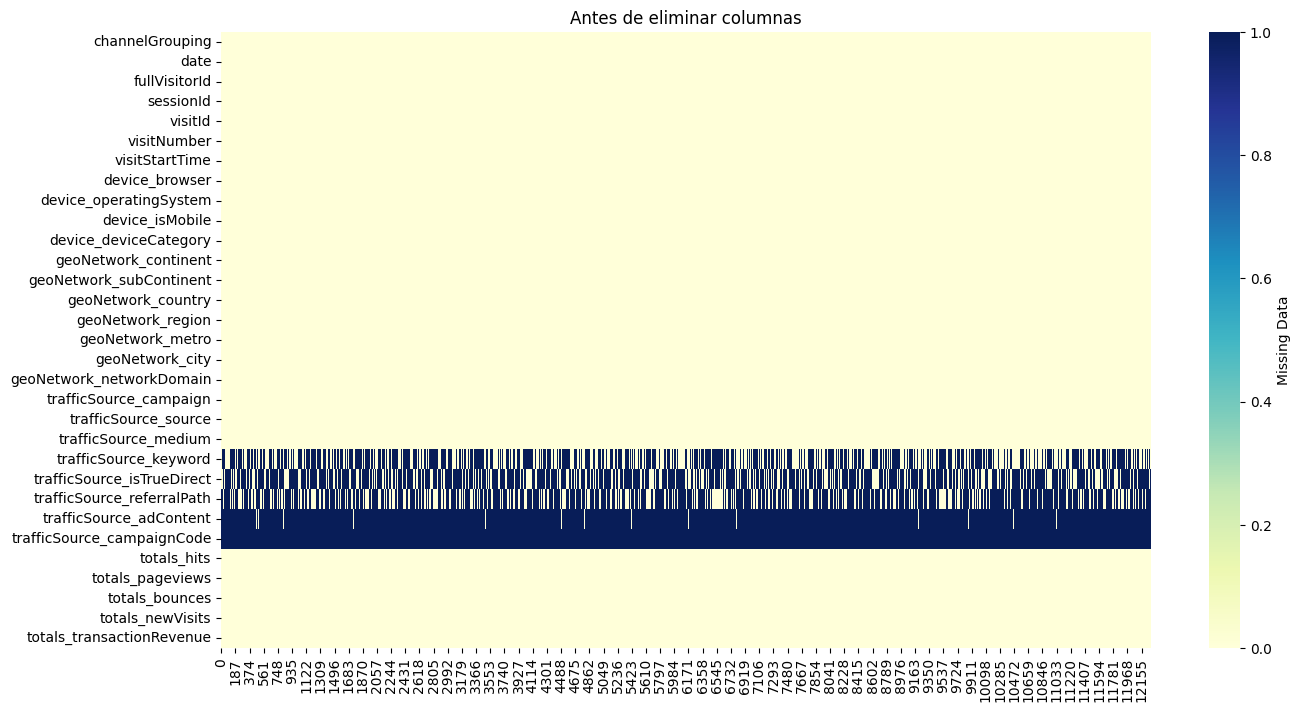


Después de eliminar columnas:
Detalles de campos nulos:
channelGrouping                     0.00%
date                                0.00%
fullVisitorId                       0.00%
sessionId                           0.00%
visitId                             0.00%
visitNumber                         0.00%
visitStartTime                      0.00%
device_browser                      0.00%
device_operatingSystem              0.00%
device_isMobile                     0.00%
device_deviceCategory               0.00%
geoNetwork_continent                0.00%
geoNetwork_subContinent             0.00%
geoNetwork_country                  0.00%
geoNetwork_region                   0.00%
geoNetwork_metro                    0.00%
geoNetwork_city                     0.00%
geoNetwork_networkDomain            0.00%
trafficSource_campaign              0.00%
trafficSource_source                0.00%
trafficSource_medium                0.00%
totals_hits                         0.00%
totals_pageviews   

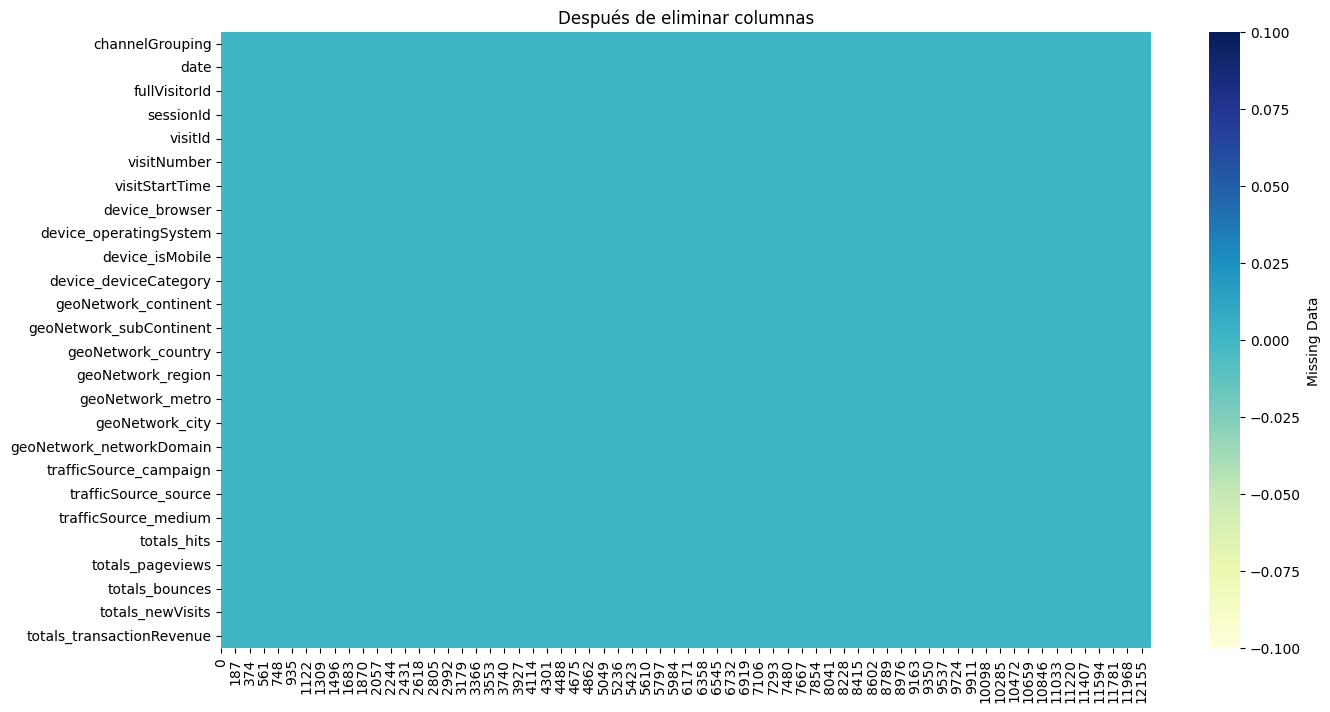

In [ ]:
df_traffic = mostrar_y_eliminar_columnas_nulos(df_traffic, umbral=30)

In [ ]:
df_traffic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12283 entries, 0 to 12282
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   channelGrouping            12283 non-null  object        
 1   date                       12283 non-null  datetime64[ns]
 2   fullVisitorId              12283 non-null  object        
 3   sessionId                  12283 non-null  object        
 4   visitId                    12283 non-null  object        
 5   visitNumber                12283 non-null  int64         
 6   visitStartTime             12283 non-null  datetime64[ns]
 7   device_browser             12283 non-null  object        
 8   device_operatingSystem     12283 non-null  object        
 9   device_isMobile            12283 non-null  bool          
 10  device_deviceCategory      12283 non-null  object        
 11  geoNetwork_continent       12283 non-null  object        
 12  geoN

In [ ]:
# Asi queda la data al final de la primera parte del preprocesamiento
df_traffic.head()

,channelGrouping,date,fullVisitorId,sessionId,visitId,visitNumber,visitStartTime,device_browser,device_operatingSystem,device_isMobile,device_deviceCategory,geoNetwork_continent,geoNetwork_subContinent,geoNetwork_country,geoNetwork_region,geoNetwork_metro,geoNetwork_city,geoNetwork_networkDomain,trafficSource_campaign,trafficSource_source,trafficSource_medium,totals_hits,totals_pageviews,totals_bounces,totals_newVisits,totals_transactionRevenue
0,Organic Search,2016-09-02,9674781571160116268,9674781571160116268_1472804607,1472804607,1,2016-09-02 08:23:27,Chrome,Windows,False,desktop,Asia,Southeast Asia,Singapore,(not set),(not set),Singapore,unknown.unknown,(not set),google,organic,1,1,1,1,0.0
1,Organic Search,2016-09-02,8590648239310839049,8590648239310839049_1472835928,1472835928,1,2016-09-02 17:05:28,Chrome,Macintosh,False,desktop,Europe,Eastern Europe,Poland,not available in demo dataset,not available in demo dataset,not available in demo dataset,tpnet.pl,(not set),google,organic,1,1,1,1,0.0
2,Affiliates,2016-09-02,9772828344252850532,9772828344252850532_1472856802,1472856802,1,2016-09-02 22:53:22,Chrome,Macintosh,False,desktop,Americas,South America,Argentina,Buenos Aires,(not set),Buenos Aires,phonevision.com.ar,Data Share Promo,Partners,affiliate,1,1,1,1,0.0
3,Organic Search,2016-09-02,1350700416054916432,1350700416054916432_1472879649,1472879649,2,2016-09-03 05:14:09,Safari,iOS,True,mobile,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,comcast.net,(not set),google,organic,1,1,1,0,0.0
4,Organic Search,2016-09-02,1350700416054916432,1350700416054916432_1472829671,1472829671,1,2016-09-02 15:21:11,Safari,iOS,True,mobile,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,att.net,(not set),google,organic,5,4,0,1,0.0


### Resumen de las columnas presentes:

1. **Datos Generales:**

  * **channelGrouping:** Categoría de agrupación del canal.
  * **date:** Fecha de la visita.
  * **fullVisitorId:** Identificador único del visitante.
  * **sessionId:** Identificador único de la sesión.
  * **visitId:** Identificador único de la visita.
  * **visitNumber:** Número de visitas del usuario.
  * **visitStartTime:** Hora de inicio de la visita.

2. **Dispositivo y Red Geográfica:**

  * **device_browser:** Navegador utilizado.
  * **device_operatingSystem:** Sistema operativo utilizado.
  * **device_isMobile**: Indica si el dispositivo es móvil.
  * **device_deviceCategory:** Categoría del dispositivo.
  * **geoNetwork_continent:** Continente geográfico.
  * **geoNetwork_subContinent:** Subcontinente geográfico.
  * **geoNetwork_country:** País.
  * **geoNetwork_region:** Región geográfica.
  * **geoNetwork_metro:** Zona metropolitana.
  * **geoNetwork_city:** Ciudad.
  * **geoNetwork_networkDomain:** Dominio de red geográfica.

3. **Fuente de Tráfico:**

  * **trafficSource_campaign:** Campaña de tráfico.
  * **trafficSource_source:** Origen del tráfico.
  * **trafficSource_medium:** Medio de tráfico.

4. Totales de Visitas:

  * **totals_hits:** Número total de hits.
  * **totals_pageviews:** Número total de páginas vistas.
  * **totals_bounces:** Número total de rebotes.
  * **totals_newVisits:** Número total de nuevas visitas.

5. **Ingresos por Transacciones:**

  * **totals_transactionRevenue:** Ingresos totales por transacciones.

#**3. Exploración y Feature Engineering**

En este paso vamos a analizar y comprender el conjunto de datos proporcionado, identificar variables llaves y realizar visualizaciones para entender las relaciones entre las variables.

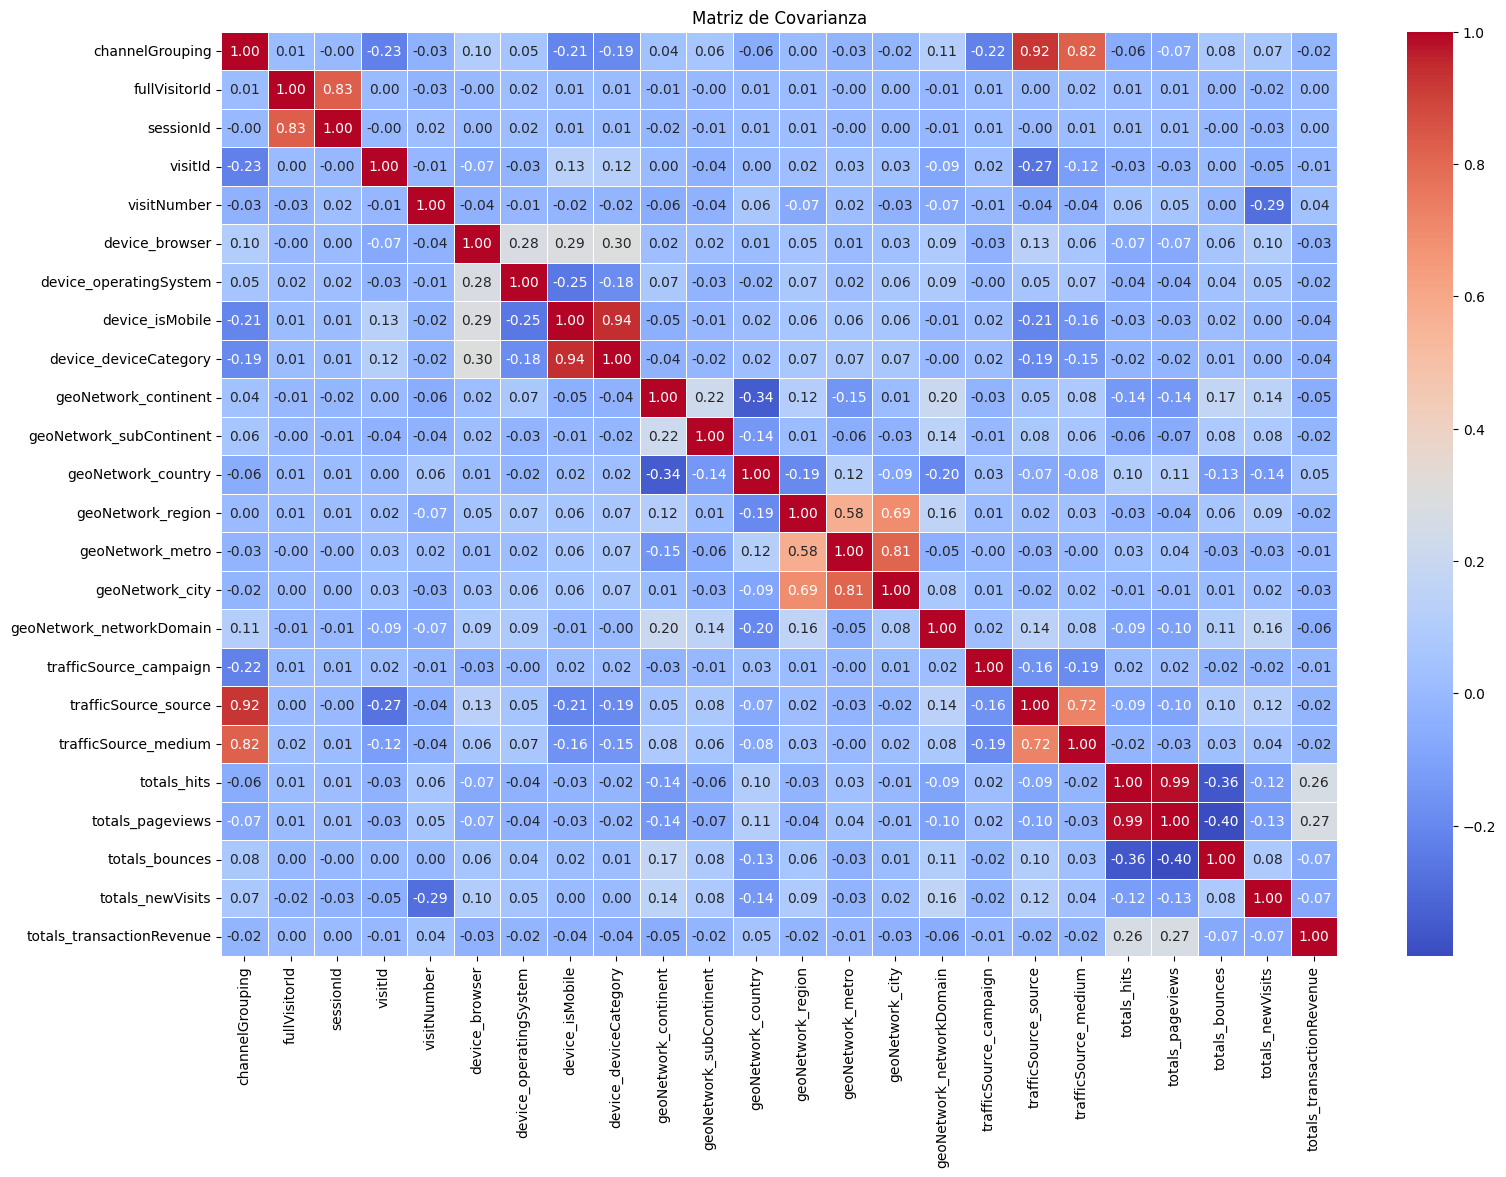

In [ ]:
# Diagrama de correlación
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler

# df_traffic es el DataFrame
df_visualizar = df_traffic.copy()  # Crear una copia para evitar modificar el DataFrame original

# Excluir las columnas de fecha
date_columns = df_visualizar.select_dtypes(include=['datetime64']).columns
df_numeric = df_visualizar.drop(columns=date_columns)

# Aplicar codificación de etiquetas solo a las columnas categóricas (dtype == 'O')
label_encoder = LabelEncoder()
categorical_columns = df_numeric.select_dtypes(include=['object']).columns
df_numeric[categorical_columns] = df_numeric[categorical_columns].apply(lambda x: label_encoder.fit_transform(x) if x.dtype == 'O' else x)

# Escalar las variables numéricas
numeric_columns = df_numeric.select_dtypes(exclude=['object']).columns
scaler = StandardScaler()
df_numeric[numeric_columns] = scaler.fit_transform(df_numeric[numeric_columns])

# Reemplazar las columnas de fecha en el DataFrame escalado
df_scaled = df_visualizar.copy()
df_scaled[numeric_columns] = df_numeric[numeric_columns]

# Calcular la matriz de covarianza
cov_matrix = df_scaled.cov()

# Crear el heatmap
plt.figure(figsize=(18, 12))
sns.heatmap(cov_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Matriz de Covarianza')
plt.show()

Antes de crear la función `feature_engineering` haremos una copia al **df_traffic** para ver si no hay errores

.

In [ ]:
df_traffic_pruebas1 = df_traffic.copy()

In [ ]:
df_traffic_pruebas1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12283 entries, 0 to 12282
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   channelGrouping            12283 non-null  object        
 1   date                       12283 non-null  datetime64[ns]
 2   fullVisitorId              12283 non-null  object        
 3   sessionId                  12283 non-null  object        
 4   visitId                    12283 non-null  object        
 5   visitNumber                12283 non-null  int64         
 6   visitStartTime             12283 non-null  datetime64[ns]
 7   device_browser             12283 non-null  object        
 8   device_operatingSystem     12283 non-null  object        
 9   device_isMobile            12283 non-null  bool          
 10  device_deviceCategory      12283 non-null  object        
 11  geoNetwork_continent       12283 non-null  object        
 12  geoN

In [ ]:
# Antes de aplicar la función feature_engineering
print("Número de nulos en 'visitStartTime' antes de la función:", df_traffic_pruebas1['visitStartTime'].isnull().sum())

Número de nulos en 'visitStartTime' antes de la función: 0


In [ ]:
def feature_engineering1():
    global df_traffic_pruebas1

    # Crear nuevas variables a partir de 'date'
    df_traffic_pruebas1['year'] = df_traffic_pruebas1['date'].dt.year
    df_traffic_pruebas1['month'] = df_traffic_pruebas1['date'].dt.month
    df_traffic_pruebas1['quarterMonth'] = df_traffic_pruebas1['date'].dt.quarter
    df_traffic_pruebas1['day'] = df_traffic_pruebas1['date'].dt.day
    df_traffic_pruebas1['weekday'] = df_traffic_pruebas1['date'].dt.weekday

    # Crear variable 'time_range' a partir de 'visitStartTime'
    df_traffic_pruebas1['time_range'] = pd.cut(df_traffic_pruebas1['visitStartTime'].dt.hour,
                                               bins=[0, 6, 12, 18, 24],
                                               labels=['madrugada', 'mañana', 'tarde', 'noche'],
                                               ordered=False).astype('object')

    # Eliminar atributos no utilizados
    df_traffic_pruebas1 = df_traffic_pruebas1.drop(['date', 'fullVisitorId', 'sessionId', 'visitId'], axis=1)

    # Mantener 'visitStartTime' si es necesario, de lo contrario, elimínalo
    if 'visitStartTime' in df_traffic_pruebas1.columns:
        df_traffic_pruebas1 = df_traffic_pruebas1.drop(['visitStartTime'], axis=1)

# Llamada a la función
feature_engineering1()


In [ ]:
df_traffic_pruebas1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12283 entries, 0 to 12282
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   channelGrouping            12283 non-null  object 
 1   visitNumber                12283 non-null  int64  
 2   device_browser             12283 non-null  object 
 3   device_operatingSystem     12283 non-null  object 
 4   device_isMobile            12283 non-null  bool   
 5   device_deviceCategory      12283 non-null  object 
 6   geoNetwork_continent       12283 non-null  object 
 7   geoNetwork_subContinent    12283 non-null  object 
 8   geoNetwork_country         12283 non-null  object 
 9   geoNetwork_region          12283 non-null  object 
 10  geoNetwork_metro           12283 non-null  object 
 11  geoNetwork_city            12283 non-null  object 
 12  geoNetwork_networkDomain   12283 non-null  object 
 13  trafficSource_campaign     12283 non-null  obj

In [ ]:
# Filtrar las filas con nulos en 'time_range'
rows_with_nulls_time_range = df_traffic_pruebas1[df_traffic_pruebas1['time_range'].isnull()]

# Imprimir las primeras filas con nulos en 'time_range'
print("Filas con nulos en 'time_range':\n", rows_with_nulls_time_range.head())

Filas con nulos en 'time_range':
     channelGrouping  visitNumber device_browser device_operatingSystem  \
122          Social            1         Chrome                Windows   
166          Direct            1         Chrome                Android   
168          Direct            2         Chrome                    iOS   
173          Social            1           Edge                Windows   
190          Direct            1         Chrome                Android   

     device_isMobile device_deviceCategory geoNetwork_continent  \
122            False               desktop               Africa   
166             True                mobile             Americas   
168             True                mobile                 Asia   
173            False               desktop             Americas   
190             True                mobile             Americas   

    geoNetwork_subContinent geoNetwork_country              geoNetwork_region  \
122         Northern Africa          

In [ ]:
# Verificar si la columna 'visitStartTime' está presente en df_traffic_pruebas1
print("'visitStartTime' está presente en df_traffic_pruebas1:", 'visitStartTime' in df_traffic_pruebas1.columns)

# Verificar las primeras filas del DataFrame
print("Primeras filas del DataFrame:\n", df_traffic_pruebas1.head())


'visitStartTime' está presente en df_traffic_pruebas1: False
Primeras filas del DataFrame:
   channelGrouping  visitNumber device_browser device_operatingSystem  \
0  Organic Search            1         Chrome                Windows   
1  Organic Search            1         Chrome              Macintosh   
2      Affiliates            1         Chrome              Macintosh   
3  Organic Search            2         Safari                    iOS   
4  Organic Search            1         Safari                    iOS   

   device_isMobile device_deviceCategory geoNetwork_continent  \
0            False               desktop                 Asia   
1            False               desktop               Europe   
2            False               desktop             Americas   
3             True                mobile             Americas   
4             True                mobile             Americas   

  geoNetwork_subContinent geoNetwork_country              geoNetwork_region  \
0    

In [ ]:
df_traffic_pruebas2 = df_traffic.copy()

In [ ]:
def feature_engineering2():
    global df_traffic_pruebas2

    # Crear nuevas variables a partir de 'date'
    df_traffic_pruebas2['year'] = df_traffic_pruebas2['date'].dt.year
    df_traffic_pruebas2['month'] = df_traffic_pruebas2['date'].dt.month
    df_traffic_pruebas2['quarterMonth'] = df_traffic_pruebas2['date'].dt.quarter
    df_traffic_pruebas2['day'] = df_traffic_pruebas2['date'].dt.day
    df_traffic_pruebas2['weekday'] = df_traffic_pruebas2['date'].dt.weekday

    # Crear variable 'time_range' a partir de 'visitStartTime'
    df_traffic_pruebas2['time_range'] = pd.cut(df_traffic_pruebas2['visitStartTime'].dt.hour,
                                               bins=[0, 6, 12, 18, 24],
                                               labels=['madrugada', 'mañana', 'tarde', 'noche'],
                                               right=False,
                                               ordered=False).astype('object')

    # Eliminar atributos no utilizados
    df_traffic_pruebas2 = df_traffic_pruebas2.drop(['date', 'fullVisitorId', 'sessionId', 'visitId'], axis=1)

    # Mantener 'visitStartTime' si es necesario, de lo contrario, elimínalo
    if 'visitStartTime' in df_traffic_pruebas2.columns:
        df_traffic_pruebas2 = df_traffic_pruebas2.drop(['visitStartTime'], axis=1)

# Llamada a la función
feature_engineering2()


In [ ]:
df_traffic_pruebas2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12283 entries, 0 to 12282
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   channelGrouping            12283 non-null  object 
 1   visitNumber                12283 non-null  int64  
 2   device_browser             12283 non-null  object 
 3   device_operatingSystem     12283 non-null  object 
 4   device_isMobile            12283 non-null  bool   
 5   device_deviceCategory      12283 non-null  object 
 6   geoNetwork_continent       12283 non-null  object 
 7   geoNetwork_subContinent    12283 non-null  object 
 8   geoNetwork_country         12283 non-null  object 
 9   geoNetwork_region          12283 non-null  object 
 10  geoNetwork_metro           12283 non-null  object 
 11  geoNetwork_city            12283 non-null  object 
 12  geoNetwork_networkDomain   12283 non-null  object 
 13  trafficSource_campaign     12283 non-null  obj

In [ ]:
# Verificar si la columna 'visitStartTime' está presente en df_traffic_pruebas1
print("'visitStartTime' está presente en df_traffic_pruebas2:", 'visitStartTime' in df_traffic_pruebas2.columns)

# Verificar las primeras filas del DataFrame
print("Primeras filas del DataFrame:\n", df_traffic_pruebas2.head())

'visitStartTime' está presente en df_traffic_pruebas2: False
Primeras filas del DataFrame:
   channelGrouping  visitNumber device_browser device_operatingSystem  \
0  Organic Search            1         Chrome                Windows   
1  Organic Search            1         Chrome              Macintosh   
2      Affiliates            1         Chrome              Macintosh   
3  Organic Search            2         Safari                    iOS   
4  Organic Search            1         Safari                    iOS   

   device_isMobile device_deviceCategory geoNetwork_continent  \
0            False               desktop                 Asia   
1            False               desktop               Europe   
2            False               desktop             Americas   
3             True                mobile             Americas   
4             True                mobile             Americas   

  geoNetwork_subContinent geoNetwork_country              geoNetwork_region  \
0    

Ahora procedermos a crear la función `feature_engineering` y tener en cuenta:

* Crear nuevas variables a partir de la columna `date` puede ser beneficioso porque permite extraer información más específica y relevante de las fechas. Las fechas y horas suelen contener información valiosa que podría no estar completamente representada en la variable de fecha única. Al crear estas variables year, month, `quarterMonth`, `day`, `weekday` puedes capturar patrones temporales más detallados y hacer que los modelos sean más efectivos al interpretar la relación entre las fechas y la variable objetivo.
* Crear la variable `time_range` a partir de `visitStartTime` tiene como finalidad mejorar la capacidad del modelo para capturar patrones relacionados con la hora del día y proporcionar información adicional que puede ser relevante para la tarea en cuestión.
* Eliminar las columnas `fullVisitorId`, `sessionId` y `visitStartTime` se debe a varias razones por los objetivos del análisis o del modelo:

  - **Identificadores Únicos:** `fullVisitorId` y `visitId` son identificadores únicos asociados a la columnas `sesionId`. EL objetivo del análisis no requiere información detallada sobre usuarios individuales o sesiones, estas columnas podrían eliminarse para simplificar el conjunto de datos y reducir la complejidad.

  - **Reducción de Dimensionalidad:** La eliminación de estas columnas puede ayudar a reducir la dimensionalidad del conjunto de datos. Esto puede ser beneficioso si se busca simplificar el modelo o acelerar ciertos algoritmos que pueden ser sensibles a la cantidad de características.

  - **Información Duplicada o Irrelevante:** La información contenida en  `visitStartTime` ya está representada de manera adecuada en la columna `time_range` entonces no es relevante para el análisis, se procede a eliminar esta columna para evitar redundancias.

  - **Fecha y Hora por Separado:** En este caso se cree que es más conveniente trabajar con la fecha y la hora por separado. Al eliminar `visitStartTime`, se podrían haber creado nuevas variables como `year`, `month`, `day`, `weekday` y `time_range` para capturar aspectos específicos de la fecha y la hora.

In [ ]:
def feature_engineering():
    global df_traffic

    # Crear nuevas variables a partir de 'date'
    df_traffic['year'] = df_traffic['date'].dt.year
    df_traffic['month'] = df_traffic['date'].dt.month
    df_traffic['quarterMonth'] = df_traffic['date'].dt.quarter
    df_traffic['day'] = df_traffic['date'].dt.day
    df_traffic['weekday'] = df_traffic['date'].dt.weekday

    # Crear variable 'time_range' a partir de 'visitStartTime'
    df_traffic['time_range'] = pd.cut(df_traffic['visitStartTime'].dt.hour,
                                               bins=[0, 6, 12, 18, 24],
                                               labels=['madrugada', 'mañana', 'tarde', 'noche'],
                                               right=False,
                                               ordered=False).astype('object')

    # Eliminar atributos no utilizados
    df_traffic = df_traffic.drop(['date', 'fullVisitorId', 'sessionId', 'visitId'], axis=1)

    # Mantener 'visitStartTime' si es necesario, de lo contrario, elimínalo
    if 'visitStartTime' in df_traffic.columns:
        df_traffic = df_traffic.drop(['visitStartTime'], axis=1)

# Llamada a la función
feature_engineering()

In [ ]:
df_traffic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12283 entries, 0 to 12282
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   channelGrouping            12283 non-null  object 
 1   visitNumber                12283 non-null  int64  
 2   device_browser             12283 non-null  object 
 3   device_operatingSystem     12283 non-null  object 
 4   device_isMobile            12283 non-null  bool   
 5   device_deviceCategory      12283 non-null  object 
 6   geoNetwork_continent       12283 non-null  object 
 7   geoNetwork_subContinent    12283 non-null  object 
 8   geoNetwork_country         12283 non-null  object 
 9   geoNetwork_region          12283 non-null  object 
 10  geoNetwork_metro           12283 non-null  object 
 11  geoNetwork_city            12283 non-null  object 
 12  geoNetwork_networkDomain   12283 non-null  object 
 13  trafficSource_campaign     12283 non-null  obj

### **Resumen de las nuevas variables**

**Variables Temporales:**

* **year:** Extraído del año de la fecha de visita.
* **month:** Extraído del mes de la fecha de visita.
* **quarterMonth:** Extraído del trimestre del mes de la fecha de visita.
* **day:** Extraído del día del mes de la fecha de visita.
* **weekday:** Extraído del día de la semana de la fecha de visita.

**Variable de Rango de Tiempo:**

* **time_range:** Creado a partir de la hora de inicio de la visita. La columna se agrupa en intervalos de 6 horas (madrugada, mañana, tarde, noche).


Creando algunos gráficos

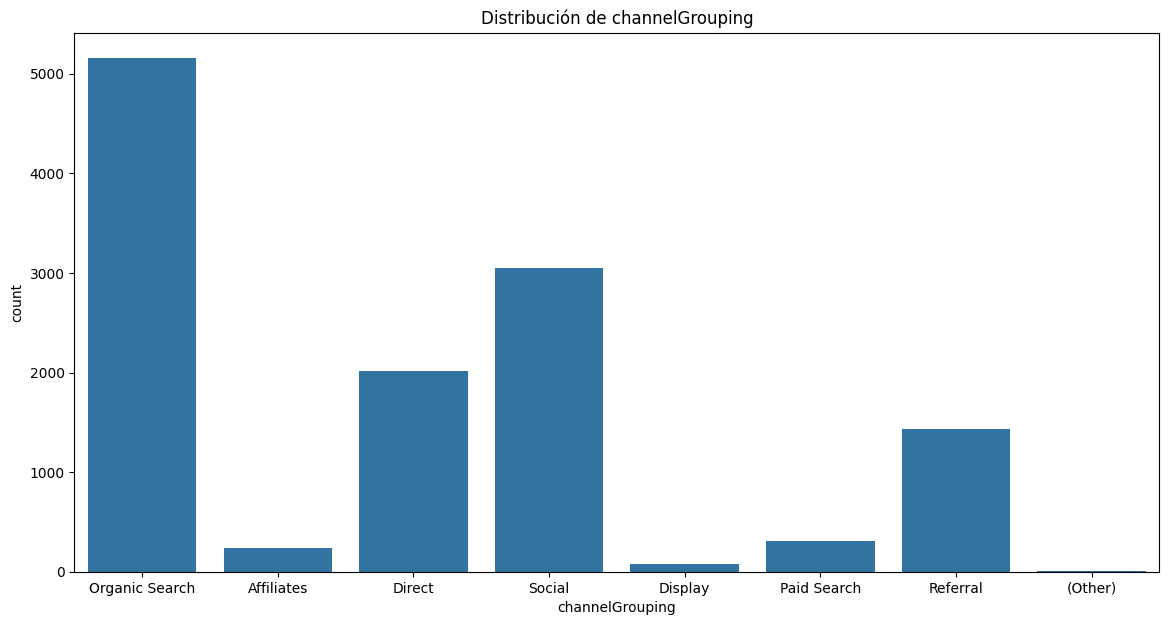

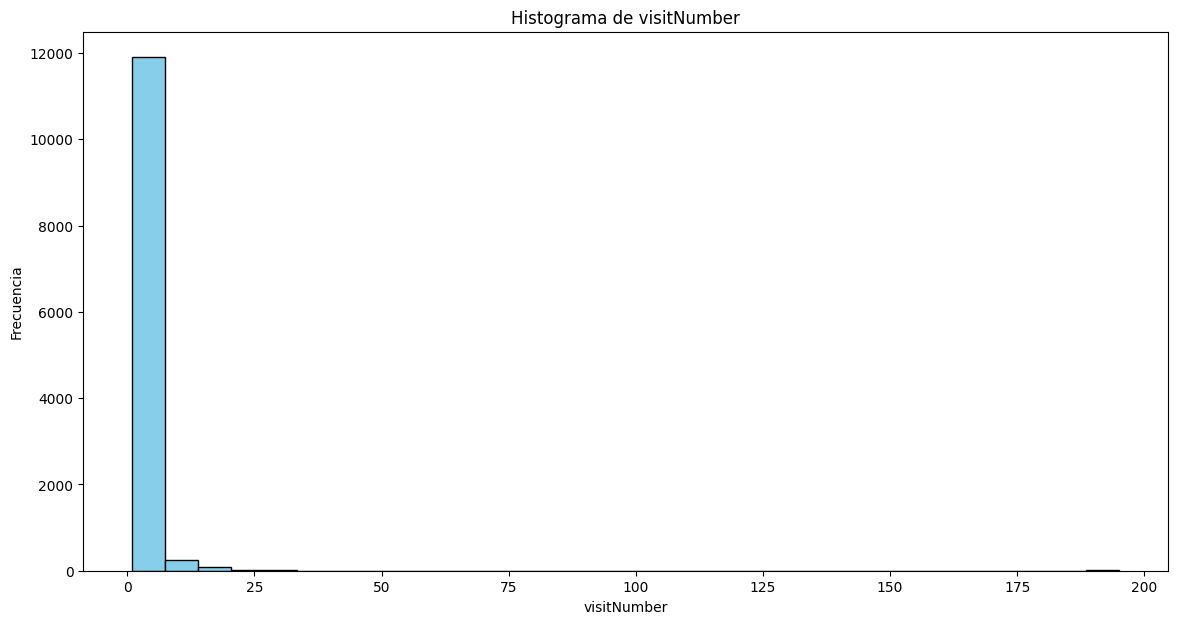

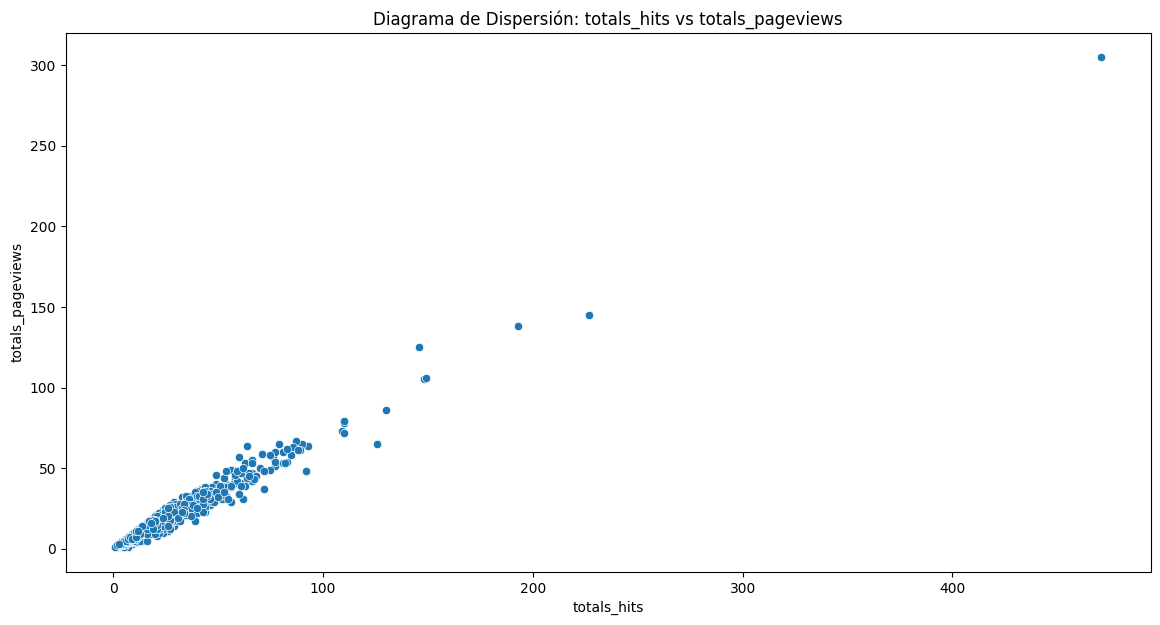

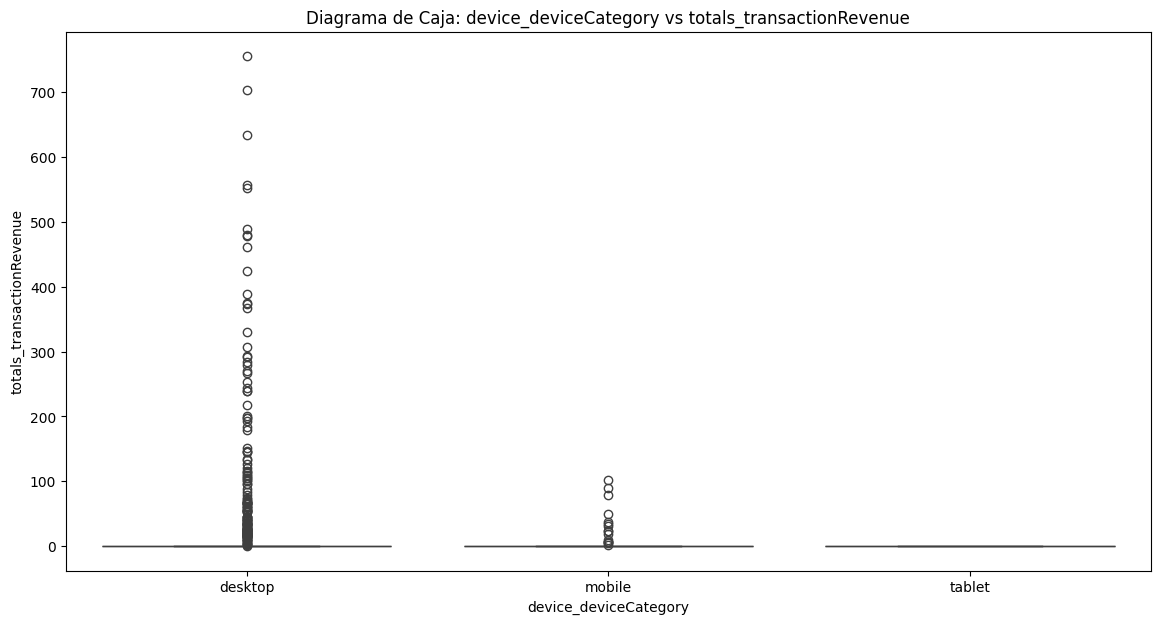

<Figure size 1400x700 with 0 Axes>

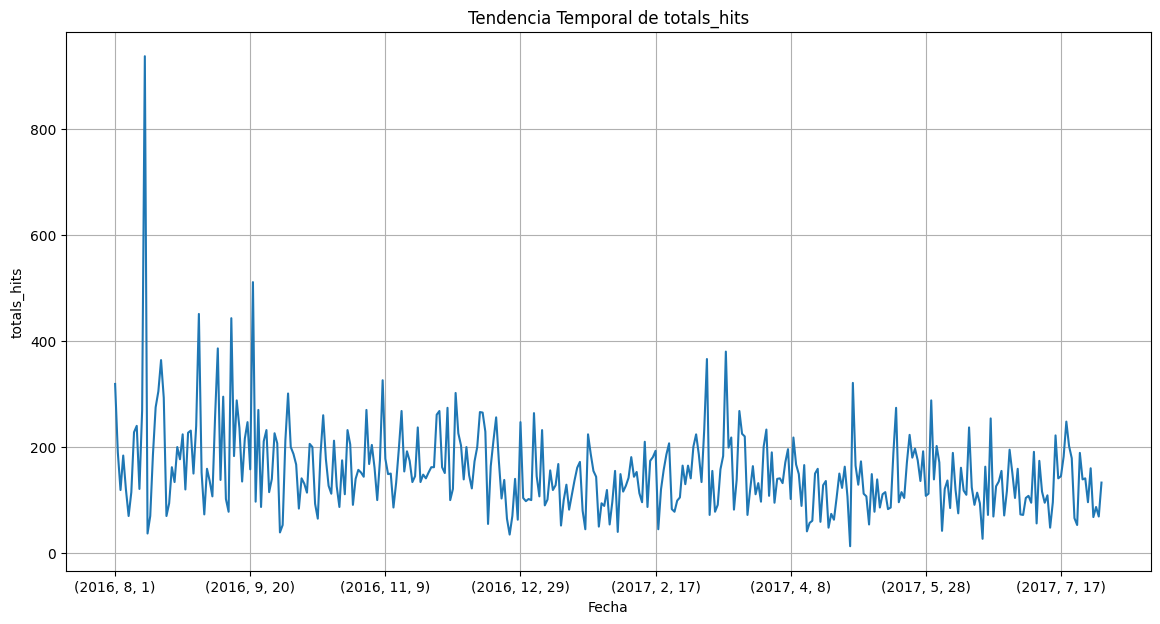

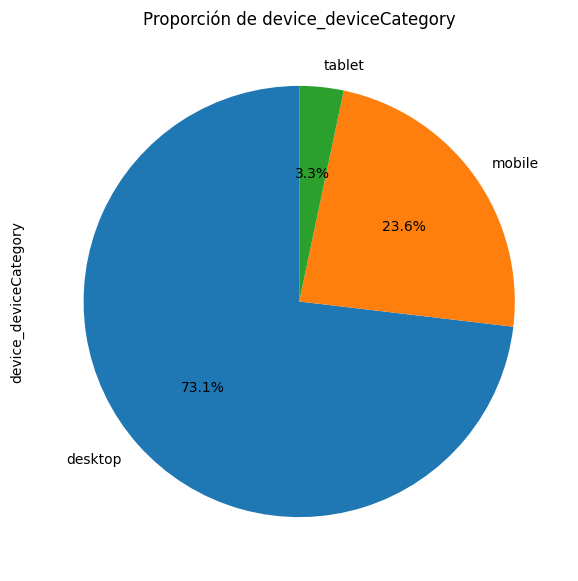

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def visualizar_datos(df, columna=None, tipo='bar', bins=None):
    plt.figure(figsize=(14, 7))

    if tipo == 'bar':
        sns.countplot(x=columna, data=df)
        plt.title(f'Distribución de {columna}')

    elif tipo == 'hist':
        plt.hist(df[columna], bins=bins, color='skyblue', edgecolor='black')
        plt.title(f'Histograma de {columna}')
        plt.xlabel(columna)
        plt.ylabel('Frecuencia')

    elif tipo == 'scatter':
        sns.scatterplot(x=df['totals_hits'], y=df['totals_pageviews'])
        plt.title('Diagrama de Dispersión: totals_hits vs totals_pageviews')

    elif tipo == 'box':
        sns.boxplot(x=df['device_deviceCategory'], y=df['totals_transactionRevenue'])
        plt.title('Diagrama de Caja: device_deviceCategory vs totals_transactionRevenue')

    elif tipo == 'line':
        # Comentamos la siguiente línea para evitar la creación de la columna 'fecha'
        # df['fecha'] = pd.to_datetime(df['year'].astype(str) + '-' + df['month'].astype(str) + '-' + df['day'].astype(str))

        # Utilizamos 'year', 'month' y 'day' directamente para la visualización temporal
        df_grouped = df.groupby(['year', 'month', 'day'])[columna].sum()
        df_grouped.plot()

        plt.title(f'Tendencia Temporal de {columna}')
        plt.xlabel('Fecha')
        plt.ylabel(columna)
        plt.grid(True)
        plt.show()

    elif tipo == 'pie':
        df[columna].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
        plt.title(f'Proporción de {columna}')

    plt.show()

# Ejemplos de uso:
visualizar_datos(df_traffic, 'channelGrouping', tipo='bar')
visualizar_datos(df_traffic, 'visitNumber', tipo='hist', bins=30)
visualizar_datos(df_traffic, tipo='scatter')
visualizar_datos(df_traffic, tipo='box')
visualizar_datos(df_traffic, tipo='heatmap')
visualizar_datos(df_traffic, 'totals_hits', tipo='line')
visualizar_datos(df_traffic, 'device_deviceCategory', tipo='pie')


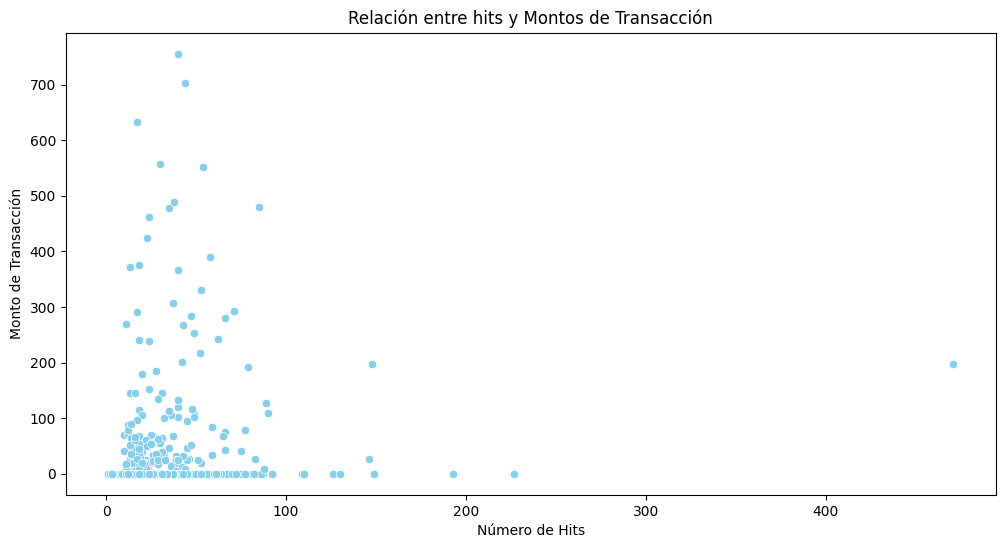

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el tamaño de la figura
plt.figure(figsize=(12, 6))

# Crear un scatter plot
sns.scatterplot(x=df_traffic['totals_hits'], y=df_traffic['totals_transactionRevenue'], color='skyblue')

# Configurar el título y las etiquetas del eje
plt.title('Relación entre hits y Montos de Transacción')
plt.xlabel('Número de Hits')
plt.ylabel('Monto de Transacción')

# Mostrar la gráfica
plt.show()



la variable totals_hits es el número total de interacciones (hits) que un usuario realizó durante una visita al sitio web. En otras palabras, representa la cantidad total de acciones que un usuario tomó, como cargar una página, hacer clic en un enlace, o realizar alguna otra interacción con el sitio.

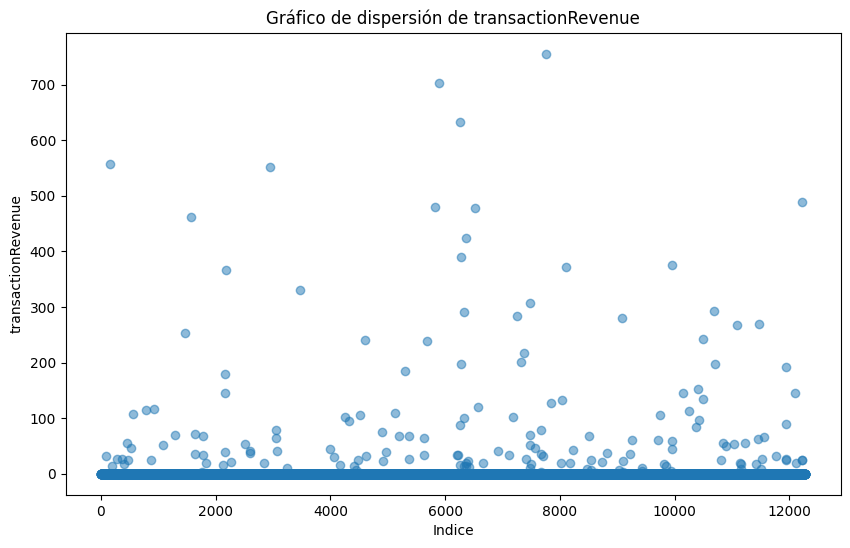

In [ ]:
# Gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(range(len(df_traffic['totals_transactionRevenue'])), df_traffic['totals_transactionRevenue'], alpha=0.5)
plt.title('Gráfico de dispersión de transactionRevenue')
plt.xlabel('Indice')
plt.ylabel('transactionRevenue')
plt.show()


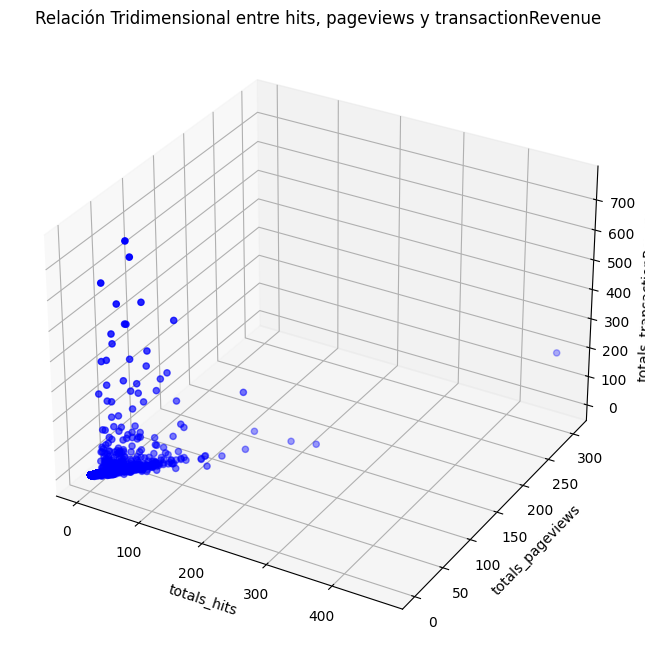

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df_traffic['totals_hits'], df_traffic['totals_pageviews'], df_traffic['totals_transactionRevenue'], c='blue', marker='o')

ax.set_xlabel('totals_hits')
ax.set_ylabel('totals_pageviews')
ax.set_zlabel('totals_transactionRevenue')

plt.title('Relación Tridimensional entre hits, pageviews y transactionRevenue')
plt.show()


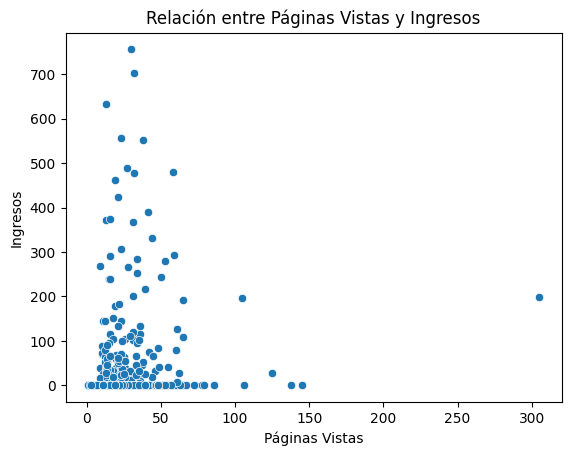

In [ ]:
sns.scatterplot(x='totals_pageviews', y='totals_transactionRevenue', data=df_traffic)
plt.title('Relación entre Páginas Vistas y Ingresos')
plt.xlabel('Páginas Vistas')
plt.ylabel('Ingresos')
plt.show()

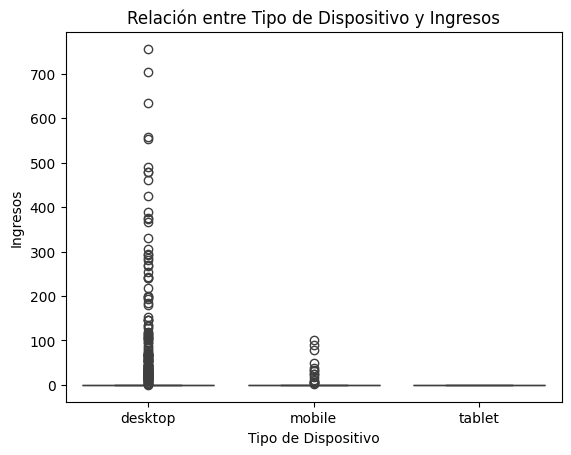

In [ ]:
sns.boxplot(x='device_deviceCategory', y='totals_transactionRevenue', data=df_traffic)
plt.title('Relación entre Tipo de Dispositivo y Ingresos')
plt.xlabel('Tipo de Dispositivo')
plt.ylabel('Ingresos')
plt.show()


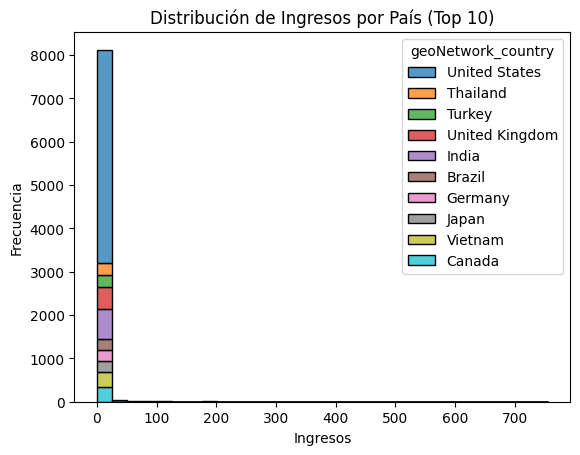

In [ ]:
top_countries = df_traffic['geoNetwork_country'].value_counts().nlargest(10).index
sns.histplot(data=df_traffic[df_traffic['geoNetwork_country'].isin(top_countries)], x='totals_transactionRevenue', hue='geoNetwork_country', multiple='stack', bins=30)
plt.title('Distribución de Ingresos por País (Top 10)')
plt.xlabel('Ingresos')
plt.ylabel('Frecuencia')
plt.show()


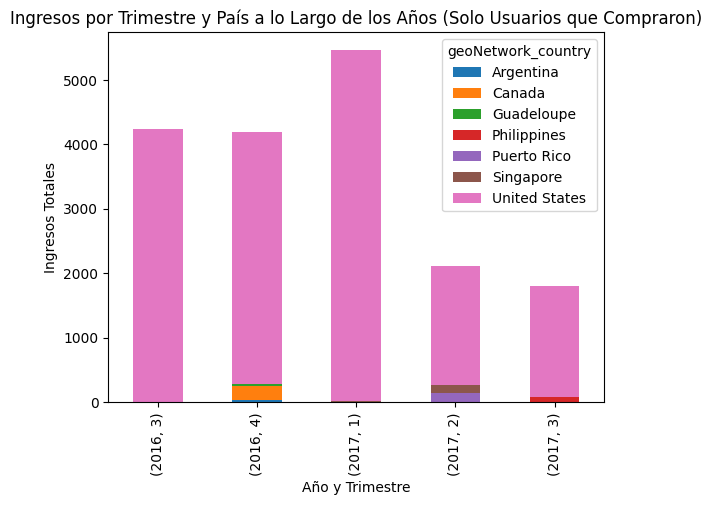

In [ ]:
# Filtrar solo las filas donde totals_transactionRevenue es mayor que 0 (se han realizado transacciones)
df_sales = df_traffic[df_traffic['totals_transactionRevenue'] > 0]

# Asignar un valor específico para 'Desconocido' en geoNetwork_country
df_sales.loc[df_sales['geoNetwork_country'].isna(), 'geoNetwork_country'] = 'Desconocido'

# Crear un gráfico de barras apiladas para geoNetwork_country y totals_transactionRevenue
df_temp = df_sales.groupby(['year', 'quarterMonth', 'geoNetwork_country'])['totals_transactionRevenue'].sum().unstack()
df_temp.plot(kind='bar', stacked=True)
plt.title('Ingresos por Trimestre y País a lo Largo de los Años (Solo Usuarios que Compraron)')
plt.xlabel('Año y Trimestre')
plt.ylabel('Ingresos Totales')
plt.show()

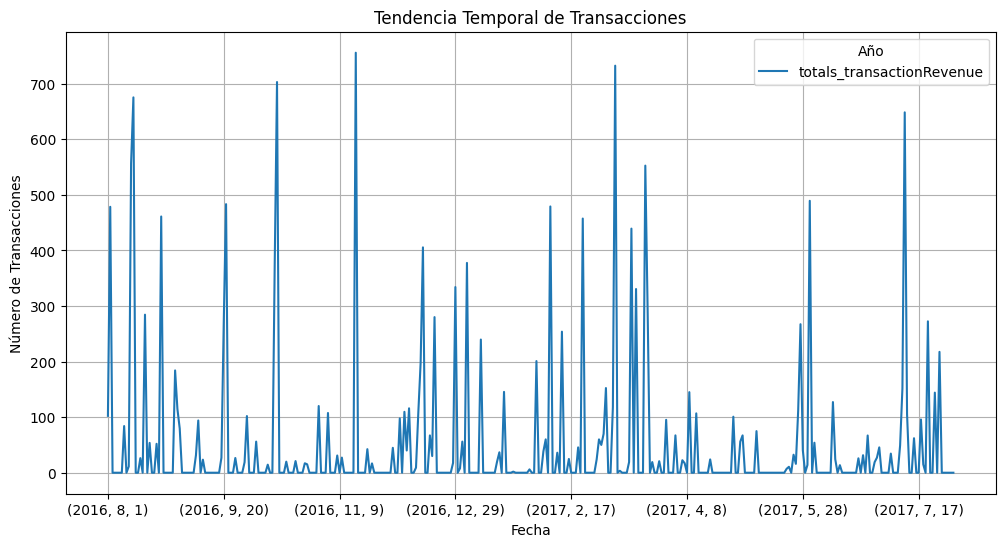

In [ ]:
import matplotlib.pyplot as plt

# Asegúrate de tener la información de los consumos, días, meses y años en tu DataFrame agrupado
df_grouped = df_traffic.groupby(['year', 'month', 'day'])['totals_transactionRevenue'].sum()

# Gráfico combinado por día, mes y año con paleta de colores personalizada
df_grouped.plot(figsize=(12, 6), grid=True)

plt.title('Tendencia Temporal de Transacciones')
plt.xlabel('Fecha')
plt.ylabel('Número de Transacciones')
plt.legend(title='Año')
plt.show()


In [ ]:
import plotly.express as px
import pandas as pd

# Filtrar solo las filas donde totals_transactionRevenue es mayor que 0 (se han realizado transacciones)
df_sales = df_traffic[df_traffic['totals_transactionRevenue'] > 0]

# Contar la cantidad de compras por país
df_purchase_count = df_sales['geoNetwork_country'].value_counts()

# Ordenar por la cantidad de compras
df_purchase_count = df_purchase_count.sort_values()

# Crear un gráfico de barras horizontales con Plotly
fig = px.bar(df_purchase_count,
             orientation='h',
             labels={'index': 'Países', 'value': 'Cantidad de Compras'},
             color='value',
             color_continuous_scale='Jet')  # Cambiado a esquema de color Viridis

# Centrar el título
fig.update_layout(
    title_text='Cantidad de Compras por País',
    title_x=0.5  # 0.5 representa el centro del eje x
)

# Mostrar el gráfico
fig.show()


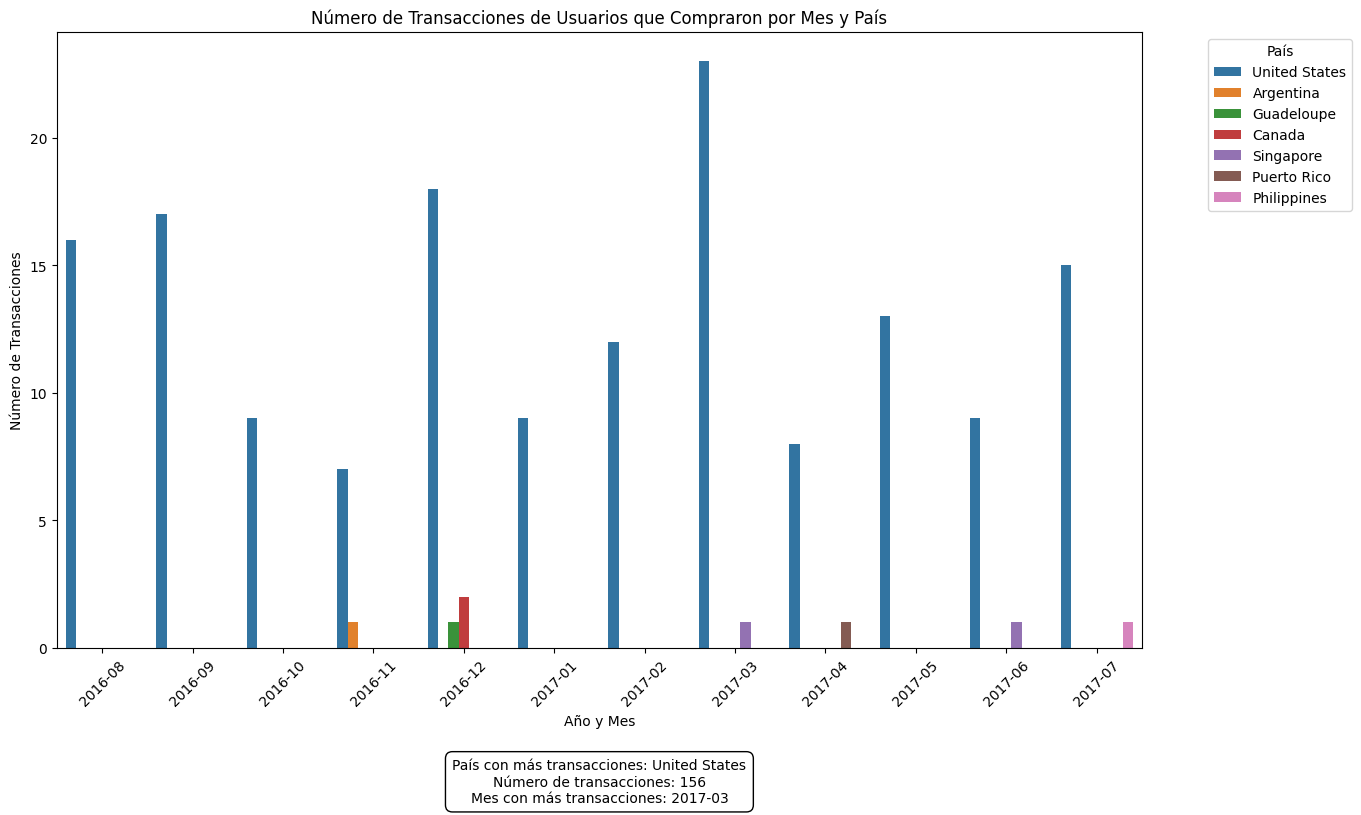

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Filtrar solo las filas donde totals_transactionRevenue es mayor que 0 (se han realizado transacciones)
df_sales = df_traffic[df_traffic['totals_transactionRevenue'] > 0]

# Crear la columna 'year_month' y convertirla en un objeto de tipo pd.Period
df_sales['year_month'] = pd.to_datetime(df_sales['year'].astype(str) + '-' + df_sales['month'].astype(str), format='%Y-%m')
df_sales['year_month'] = df_sales['year_month'].dt.to_period('M')

# Crear un gráfico de barras apiladas para contar el número de transacciones por mes y país
plt.figure(figsize=(14, 8))
ax = sns.countplot(x='year_month', hue='geoNetwork_country', data=df_sales.sort_values('year_month'))
plt.title('Número de Transacciones de Usuarios que Compraron por Mes y País')
plt.xlabel('Año y Mes')
plt.ylabel('Número de Transacciones')
plt.xticks(rotation=45)
plt.legend(title='País', loc='upper right', bbox_to_anchor=(1.2, 1))

# Obtener la información sobre el número de transacciones más alto
top_country_month = df_sales.groupby(['year_month', 'geoNetwork_country'])['totals_transactionRevenue'].count().idxmax()
top_country, top_month = top_country_month[-1], top_country_month[0]

# Obtener el número de transacciones del país con más transacciones
top_country_transactions = df_sales[df_sales['geoNetwork_country'] == top_country]['totals_transactionRevenue'].count()

# Crear un cuadro de descripción
desc_box = f'País con más transacciones: {top_country}\nNúmero de transacciones: {top_country_transactions}\nMes con más transacciones: {top_month}'

# Agregar el cuadro de descripción en la parte inferior del gráfico
plt.text(0.5, -0.25, desc_box, transform=ax.transAxes, ha='center', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

plt.show()


------

In [ ]:
import pandas as pd

# Agrupar por time_range y calcular estadísticas descriptivas
revenue_summary = df_traffic.groupby('time_range')['totals_transactionRevenue'].describe()

# Mostrar el resumen
print(revenue_summary)

             count      mean        std  min  25%  50%  75%     max
time_range                                                         
madrugada   2518.0  0.902752  13.174402  0.0  0.0  0.0  0.0  460.98
mañana      2540.0  0.111480   2.904134  0.0  0.0  0.0  0.0  127.12
noche       3609.0  2.607221  28.450922  0.0  0.0  0.0  0.0  755.63
tarde       3616.0  1.609085  23.360472  0.0  0.0  0.0  0.0  702.90


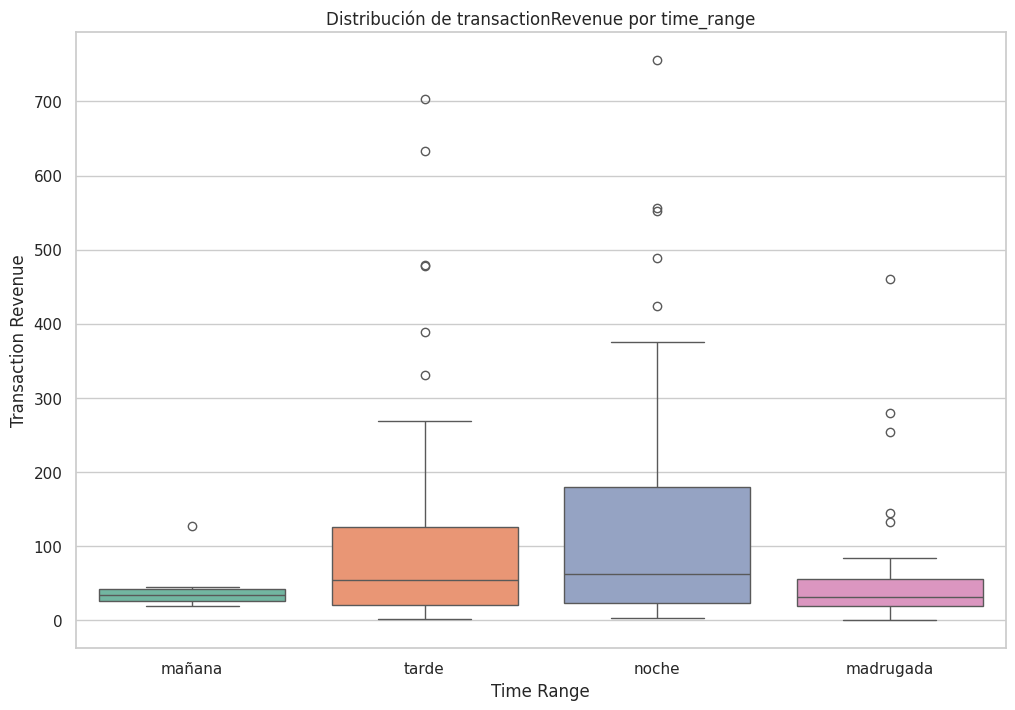

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar solo las filas con transacciones (transactionRevenue > 0)
df_transactions = df_traffic[df_traffic['totals_transactionRevenue'] > 0]

# Configurar el estilo de seaborn
sns.set(style="whitegrid")

# Definir una paleta de colores
palette = sns.color_palette("Set2")

# Crear el diagrama de caja con colores
plt.figure(figsize=(12, 8))
sns.boxplot(x='time_range', y='totals_transactionRevenue', data=df_transactions, order=['mañana', 'tarde', 'noche', 'madrugada'], palette=palette)
plt.title('Distribución de transactionRevenue por time_range')
plt.xlabel('Time Range')
plt.ylabel('Transaction Revenue')
plt.show()


Interpretación de las estadísticas descriptivas para las transacciones con transactionRevenue mayor que cero, organizadas por time_range.

### **Interpretación:**

1. **Madrugada:**

  * Las transacciones en la madrugada tienen una mediana (línea dentro de la caja) alrededor de $31.49.
  * La mayoría de las transacciones se concentran en valores más bajos, pero hay algunos valores atípicos (puntos fuera de la caja) que son mayores.

2. **Mañana:**

  * Las transacciones en la mañana tienen una mediana alrededor de $33.66.
  * La dispersión es menor en comparación con la madrugada, con algunos valores atípicos.

3. **Noche:**

  * Las transacciones en la noche tienen una mediana de alrededor de $62.05.
  * La dispersión es mayor, con algunos valores atípicos significativamente más altos.

4. **Tarde:**

  * Las transacciones en la tarde tienen una mediana de alrededor de $53.82.
  * Similar a la noche, hay una mayor dispersión con algunos valores atípicos altos.

Este diagrama de caja proporciona una visión rápida de la distribución de las transacciones de revenue en diferentes momentos del día.

In [ ]:
import plotly.express as px
import pandas as pd

# Filtrar solo las filas donde totals_transactionRevenue es mayor que 0
df_sales = df_traffic[df_traffic['totals_transactionRevenue'] > 0]

# Crear el gráfico de dispersión con los datos filtrados
fig = px.scatter(df_sales, x="totals_hits", y="totals_pageviews", color="geoNetwork_country")

# Mostrar el gráfico
fig.show()


Gráfico que muestra la relación entre el número total de hits, el número total de páginas vistas y el país de origen, pero solo para las filas del DataFrame donde se ha registrado alguna transacción de compra. Esto puede ayudar a visualizar patrones específicos en el comportamiento de compra en función del tráfico y la geolocalización.

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Aplicar LabelEncoder a variables de tipo object
cualitativas = df_traffic.dtypes[df_traffic.dtypes == object].keys()
for columna in cualitativas:
    lbl = LabelEncoder()
    strings = list(df_traffic[columna].values.astype('str'))
    lbl.fit(strings)
    df_traffic[columna] = lbl.transform(strings)

In [ ]:
df_traffic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12283 entries, 0 to 12282
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   channelGrouping            12283 non-null  int64  
 1   visitNumber                12283 non-null  int64  
 2   device_browser             12283 non-null  int64  
 3   device_operatingSystem     12283 non-null  int64  
 4   device_isMobile            12283 non-null  bool   
 5   device_deviceCategory      12283 non-null  int64  
 6   geoNetwork_continent       12283 non-null  int64  
 7   geoNetwork_subContinent    12283 non-null  int64  
 8   geoNetwork_country         12283 non-null  int64  
 9   geoNetwork_region          12283 non-null  int64  
 10  geoNetwork_metro           12283 non-null  int64  
 11  geoNetwork_city            12283 non-null  int64  
 12  geoNetwork_networkDomain   12283 non-null  int64  
 13  trafficSource_campaign     12283 non-null  int

In [ ]:
# Hacer una copia del DataFrame original (opcional)
df_copia = df_traffic.copy()

# Exportar el DataFrame a un archivo Excel en la ruta local
ruta_archivo_excel_local = '/content/sample_data/df_traffic_final.xlsx'
df_traffic.to_excel(ruta_archivo_excel_local, index=False)

# Montar Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Mover el archivo a la carpeta de Google Drive
ruta_destino_drive = '/content/drive/MyDrive/Colab Notebooks/df_traffic-final.xlsx'
!mv {ruta_archivo_excel_local} {ruta_destino_drive}

print(f"DataFrame exportado y movido a {ruta_destino_drive}")



Mounted at /content/drive
mv: target 'Notebooks/df_traffic-final.xlsx' is not a directory
DataFrame exportado y movido a /content/drive/MyDrive/Colab Notebooks/df_traffic-final.xlsx


#**4. Construcción de Modelos**

In [ ]:
# Graphics
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb
from sklearn.preprocessing import FunctionTransformer
from joblib import dump, load

In [ ]:
# Seleccionando características y tu variable objetivo
X = df_traffic.drop('totals_transactionRevenue', axis=1)
y = df_traffic['totals_transactionRevenue'].apply(lambda x: 0 if x == 0 else 1)

# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Inicializa el StandardScaler
scaler = StandardScaler()

# Ajusta el scaler al conjunto de entrenamiento y transforma el conjunto de entrenamiento
X_train_scaled = scaler.fit_transform(X_train)

# Transforma el conjunto de prueba utilizando el scaler ajustado al conjunto de entrenamiento
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Inicializa el modelo de regresión lineal
model = LinearRegression()

# Entrena el modelo con los datos escalados de entrenamiento
model.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
# Realiza predicciones en el conjunto de prueba
predictions = model.predict(X_test_scaled)

# Asegúrate de que las predicciones no sean negativas
predictions[predictions < 0] = 0

In [ ]:
# Evalúa el rendimiento del modelo
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Imprime las métricas de rendimiento
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


Mean Squared Error: 0.0103713949153689
R^2 Score: 0.2251141396442905


In [ ]:
r2 = r2_score(y_test, predictions)*100
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)

print(f"R-cuadrado (R²): {r2}")
print(f"Error cuadrático medio (MSE): {mse}")
print(f"Raíz del error cuadrático medio (RMSE): {rmse}")

R-cuadrado (R²): 22.51141396442905
Error cuadrático medio (MSE): 0.0103713949153689
Raíz del error cuadrático medio (RMSE): 0.10184004573530443


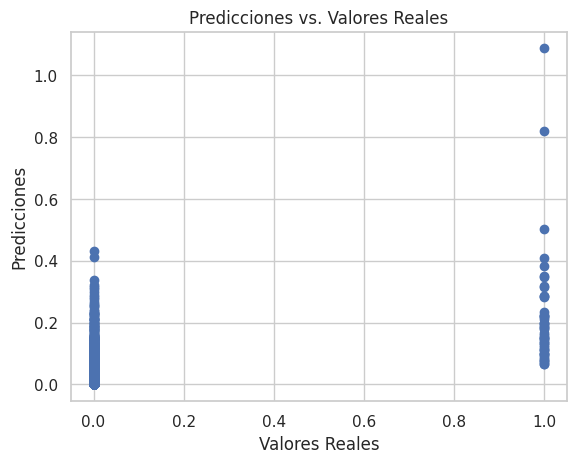

In [ ]:
plt.scatter(y_test, predictions)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs. Valores Reales')
plt.show()


In [ ]:
# Evalúa el rendimiento del modelo
mse_1 = mean_squared_error(y_test, predictions)
r2_1 = r2_score(y_test, predictions)

# Imprime las métricas de rendimiento
print(f"Mean Squared Error: {mse_1}")
print(f"R^2 Score: {r2_1}")

Mean Squared Error: 0.0103713949153689
R^2 Score: 0.2251141396442905


.

.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Inicializar el modelo
rf_model = RandomForestRegressor(random_state=42)

# Entrenar el modelo
rf_model.fit(X_train_scaled, y_train)

# Realizar predicciones en el conjunto de prueba
rf_predictions = rf_model.predict(X_test_scaled)

# Evaluar el rendimiento
mse_rf = mean_squared_error(y_test, rf_predictions)
r2_rf = r2_score(y_test, rf_predictions)
print(f"Random Forest - Mean Squared Error: {mse_rf:.2f}, R^2 Score: {r2_rf:.4f}")


Random Forest - Mean Squared Error: 0.01, R^2 Score: 0.1479


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Inicializar el modelo
gb_model = GradientBoostingRegressor(random_state=42)

# Entrenar el modelo
gb_model.fit(X_train_scaled, y_train)

# Realizar predicciones en el conjunto de prueba
gb_predictions = gb_model.predict(X_test_scaled)

# Evaluar el rendimiento
mse_gb = mean_squared_error(y_test, gb_predictions)
r2_gb = r2_score(y_test, gb_predictions)
print(f"Gradient Boosting - Mean Squared Error: {mse_gb:.2f}, R^2 Score: {r2_gb:.4f}")


Gradient Boosting - Mean Squared Error: 0.01, R^2 Score: 0.1976


In [ ]:
from sklearn.svm import SVR

# Inicializar el modelo
svr_model = SVR()

# Entrenar el modelo
svr_model.fit(X_train_scaled, y_train)

# Realizar predicciones en el conjunto de prueba
svr_predictions = svr_model.predict(X_test_scaled)

# Evaluar el rendimiento
mse_svr = mean_squared_error(y_test, svr_predictions)
r2_svr = r2_score(y_test, svr_predictions)
print(f"Support Vector Regressor - Mean Squared Error: {mse_svr:.2f}, R^2 Score: {r2_svr:.4f}")


Support Vector Regressor - Mean Squared Error: 0.01, R^2 Score: 0.0642


In [ ]:
from sklearn.linear_model import Lasso

# Crear el modelo
lasso_model = Lasso(alpha=0.1)

# Entrenar el modelo
lasso_model.fit(X_train_scaled, y_train)

# Hacer predicciones
lasso_predictions = lasso_model.predict(X_test_scaled)

mse_lasso = mean_squared_error(y_test, lasso_predictions)
r2_lasso = r2_score(y_test, lasso_predictions)

print(f'Mean Squared Error: {mse_lasso}')
print(f'R^2 Score: {r2_lasso}')


Mean Squared Error: 0.013384512135015124
R^2 Score: -7.162567266405517e-06


In [ ]:
from sklearn.linear_model import Lasso

# Inicializar el modelo Lasso
lasso_model = Lasso(alpha=0.01, random_state=42)

# Entrenar el modelo
lasso_model.fit(X_train_scaled, y_train)

# Realizar predicciones en el conjunto de prueba
lasso_predictions = lasso_model.predict(X_test_scaled)

# Evaluar el rendimiento
mse_lasso = mean_squared_error(y_test, lasso_predictions)
r2_lasso = r2_score(y_test, lasso_predictions)
print(f"Lasso Regression - Mean Squared Error: {mse_lasso:.2f}, R^2 Score: {r2_lasso:.4f}")


Lasso Regression - Mean Squared Error: 0.01, R^2 Score: 0.1682


In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

# Inicializar el modelo XGBoost para regresión
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Entrenar el modelo
xgb_model.fit(X_train_scaled, y_train)

# Realizar predicciones en el conjunto de prueba
xgb_predictions = xgb_model.predict(X_test_scaled)

# Evaluar el rendimiento
mse_xgb = mean_squared_error(y_test, xgb_predictions)
r2_xgb = r2_score(y_test, xgb_predictions)
print(f"XGBoost Regression - Mean Squared Error: {mse_xgb:.2f}, R^2 Score: {r2_xgb:.4f}")


XGBoost Regression - Mean Squared Error: 0.01, R^2 Score: 0.0186


In [ ]:
from sklearn.model_selection import GridSearchCV

# Definir los parámetros a ajustar
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    # Otros parámetros que desees ajustar
}

# Inicializar el modelo XGBoost
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Inicializar la búsqueda de hiperparámetros
grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Realizar la búsqueda de hiperparámetros en el conjunto de entrenamiento
grid_search.fit(X_train_scaled, y_train)

# Obtener el mejor modelo
best_xgb_model = grid_search.best_estimator_

# Realizar predicciones en el conjunto de prueba con el mejor modelo
best_xgb_predictions = best_xgb_model.predict(X_test_scaled)

# Evaluar el rendimiento del mejor modelo
mse_best_xgb = mean_squared_error(y_test, best_xgb_predictions)
r2_best_xgb = r2_score(y_test, best_xgb_predictions)
print(f"Best XGBoost Regression - Mean Squared Error: {mse_best_xgb:.2f}, R^2 Score: {r2_best_xgb:.4f}")


Best XGBoost Regression - Mean Squared Error: 0.01, R^2 Score: 0.2163


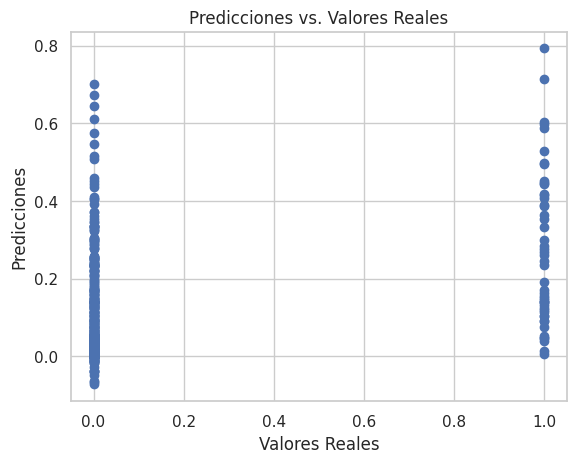

In [ ]:
plt.scatter(y_test, best_xgb_predictions)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs. Valores Reales')
plt.show()

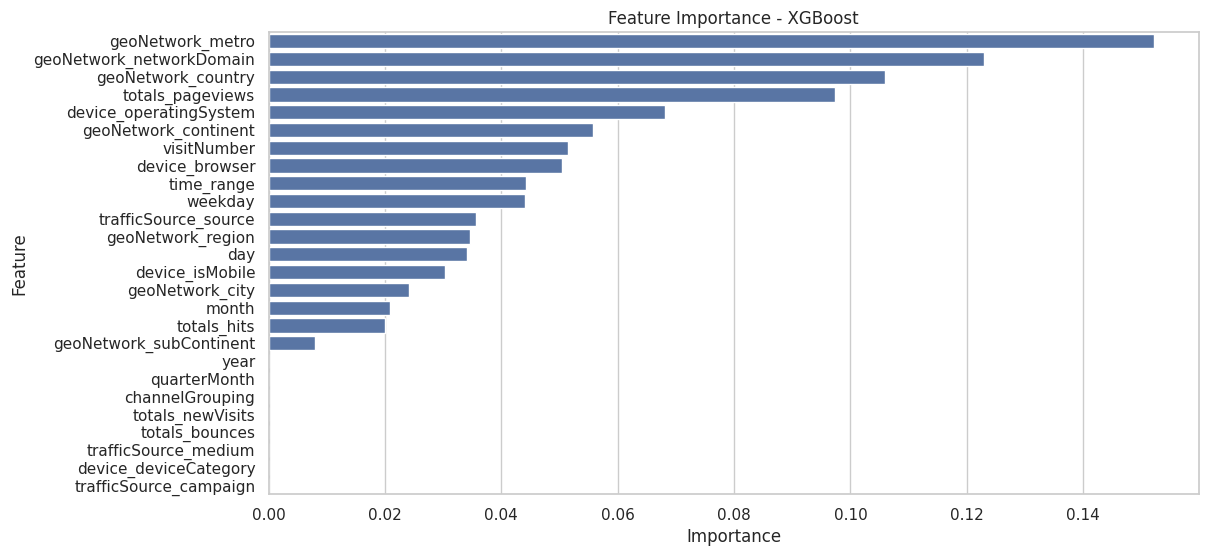

In [ ]:
# Obtener la importancia de las características
feature_importance = best_xgb_model.feature_importances_

# Crear un DataFrame con las características y su importancia
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

# Ordenar el DataFrame por importancia en orden descendente
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Visualizar la importancia de las características
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance - XGBoost')
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso

# Inicializar modelos
rf_model = RandomForestRegressor(random_state=42)
svr_model = SVR()
lasso_model = Lasso()

# Entrenar modelos
rf_model.fit(X_train_scaled, y_train)
svr_model.fit(X_train_scaled, y_train)
lasso_model.fit(X_train_scaled, y_train)

# Realizar predicciones en el conjunto de prueba
rf_predictions = rf_model.predict(X_test_scaled)
svr_predictions = svr_model.predict(X_test_scaled)
lasso_predictions = lasso_model.predict(X_test_scaled)

# Evaluar el rendimiento de los modelos
mse_rf = mean_squared_error(y_test, rf_predictions)
mse_svr = mean_squared_error(y_test, svr_predictions)
mse_lasso = mean_squared_error(y_test, lasso_predictions)

r2_rf = r2_score(y_test, rf_predictions)
r2_svr = r2_score(y_test, svr_predictions)
r2_lasso = r2_score(y_test, lasso_predictions)

print(f"Random Forest - Mean Squared Error: {mse_rf:.2f}, R^2 Score: {r2_rf:.4f}")
print(f"SVR - Mean Squared Error: {mse_svr:.2f}, R^2 Score: {r2_svr:.4f}")
print(f"LASSO - Mean Squared Error: {mse_lasso:.2f}, R^2 Score: {r2_lasso:.4f}")


Random Forest - Mean Squared Error: 0.01, R^2 Score: 0.1479
SVR - Mean Squared Error: 0.01, R^2 Score: 0.0642
LASSO - Mean Squared Error: 0.01, R^2 Score: -0.0000
